# Dissecting Spotify Valence

Spotify uses a metric called *Valence* to measure the happiness of a track. However, we don't exactly know how valance is calculated. In this analysis, we aim to decode valence and understand which features better define and explain it. We will dive deep into the high and low-level analysis of tracks, given from the Spotify API.

---

> Giorgios Markou, t8180067 <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> giorgiosmrkou@gmail.com

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np


# Statisticall tools.
import scipy.stats.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Imports for graphical representation.
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Q1: Explore which Features Influence Valence

Having already created our dataset in `Spotify_API.ipynb`, we will try to find the most significant `valence` predictors. <BR>
The dataset was originally quite large, consisting of 170.000 songs, across 1920-2022.<BR>
We kept a sample of 60.000 songs.<br>
Our Dataset contains Tracks Audio Features, Track Details and Audio Analysis, given from the Spotify API.<BR>
You can take a deeper dive into the documentation at the [Spotify API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features).<BR>

In [ ]:
tracks_data = pd.read_csv('Data/spotify_track_analysis_complete.csv')
tracks_data

index  danceability  energy  key  loudness  mode  \
0      0AJfVstyUONRJhyYgTkHMR         0.253   0.385    7    -8.031     0   
1      1V3NH8aYfFyRjfNOHgoX3G         0.219   0.222    9   -16.941     1   
2      4kfEy7h6bWBS5OaDpccTap         0.846   0.651    7    -5.481     0   
3      7qgM0MdETmhd3mORTqvJRm         0.398   0.255   10   -11.205     1   
4      1HtgEaqki4dFclmVJlJDx1         0.612   0.579    5    -7.264     1   
...                       ...           ...     ...  ...       ...   ...   
59980  0Zg4tjgfqw9qzq7lXX2sUM         0.651   0.503    1   -10.773     1   
59981  7fTPxG5w6GlYRqPyLRxWhd         0.376   0.580   11    -6.811     1   
59982  1xE9602DPXPsL0WeA4NMJ8         0.631   0.368    9   -17.159     1   
59983  4qpiLEDdxZ7cwe1FYpWU2b         0.512   0.489    5   -14.251     1   
59984  6jjd5vJtgKwzMtxJeTlLqH         0.669   0.447    1    -6.271     1   

       speechiness  acousticness  instrumentalness  liveness  ...  \
0           0.0341       0.72900          0.000000    0.0428  ...   
1           0.0390       0.97800          0.000149    0.0837  ...   
2           0.1280       0.63400          0.000000    0.1250  ...   
3           0.0373       0.94400          0.000003    0.1140  ...   
4           0.0269       0.60600          0.000009    0.3530  ...   
...            ...           ...               ...       ...  ...   
59980       0.0381       0.00297          0.007830    0.1120  ...   
59981       0.0322       0.82900          0.066900    0.4340  ...   
59982       0.0887       0.70600          0.878000    0.1800  ...   
59983       0.0552       0.65600          0.038400    0.5520  ...   
59984       0.0305       0.52400          0.000000    0.1670  ...   

       timbre_seventh_dim  timbre_eighth_dim  timbre_ninenth_dim  \
0              -18.836676          -5.662917           -4.974947   
1              -21.443766          -0.169007            3.628560   
2              -12.445991          -8.877999          -12.988764   
3              -13.666683          -1.290423           -2.751532   
4              -23.311457          -1.436244            3.628440   
...                   ...                ...                 ...   
59980            9.103229          -2.719043          -16.135705   
59981          -16.630120          -4.500622            6.792493   
59982            0.960170           5.166161          -16.976597   
59983          -10.561159           4.203400            3.858096   
59984          -16.118478         -10.863118           -1.813723   

       timbre_tenth_dim  timbre_eleventh_dim  timbre_twelveth_dim  \
0              2.575527            -7.943400             1.132670   
1              0.733900            -2.241542            12.685575   
2              5.210253           -15.425256           -12.980392   
3             -3.705883            -9.564274            -0.062936   
4              3.458393            -5.857507             2.983422   
...                 ...                  ...                  ...   
59980         -2.739258           -13.389024            -5.316257   
59981          3.497002            -7.908877           -10.241567   
59982          0.052603            -9.665687             6.359665   
59983          1.634509            -9.725600             5.728181   
59984         -4.123552           -13.867299            -3.324437   

       loudness_start  loudness_max  loudness_max_time  loudness_end  
0          -15.544900     -9.171377           0.078229     -0.108696  
1          -22.633400    -18.367952           0.091244     -0.082988  
2          -17.032742     -5.714222           0.051847     -0.062959  
3          -22.000623    -15.032950           0.080757     -0.070175  
4          -15.748438     -7.907161           0.051779     -0.085227  
...               ...           ...                ...           ...  
59980      -23.444274    -14.394895           0.039074     -0.050637  
59981      -11.499880     -5.945510           0.086045     -0.100000

- We also have a test set, given to us for validation.
- We will merge the two datasets, and then divede them when it is time for validation.

In [ ]:
test_set = pd.read_csv('Data/test_set.csv')
test_set.drop(['songs_id'],axis=1,inplace=True)

In [ ]:
test_set_indexes = test_set['index']
test_set_indexes

0       7lPN2DXiMsVn7XUKtOW1CS
1       5QO79kh1waicV47BqGRL3g
2       0VjIjW4GlUZAMYd2vXMi3b
3       4MzXwWMhyBbmu6hOcLVD49
4       5Kskr9LcNYa0tpt5f0ZEJx
                 ...          
1156    4lUmnwRybYH7mMzf16xB0y
1157    1fzf9Aad4y1RWrmwosAK5y
1158    3E3pb3qH11iny6TFDJvsg5
1159    3yTkoTuiKRGL2VAlQd7xsC
1160    4JE6agBLHGA5TaF6FlqfBD
Name: index, Length: 1161, dtype: object

In [ ]:
frames = [tracks_data, test_set]
tracks = pd.concat(frames)
tracks

index  danceability  energy  key  loudness  mode  \
0     0AJfVstyUONRJhyYgTkHMR         0.253   0.385    7    -8.031     0   
1     1V3NH8aYfFyRjfNOHgoX3G         0.219   0.222    9   -16.941     1   
2     4kfEy7h6bWBS5OaDpccTap         0.846   0.651    7    -5.481     0   
3     7qgM0MdETmhd3mORTqvJRm         0.398   0.255   10   -11.205     1   
4     1HtgEaqki4dFclmVJlJDx1         0.612   0.579    5    -7.264     1   
...                      ...           ...     ...  ...       ...   ...   
1156  4lUmnwRybYH7mMzf16xB0y         0.596   0.650    9    -5.167     1   
1157  1fzf9Aad4y1RWrmwosAK5y         0.588   0.850    4    -6.431     1   
1158  3E3pb3qH11iny6TFDJvsg5         0.754   0.660    0    -6.811     1   
1159  3yTkoTuiKRGL2VAlQd7xsC         0.584   0.836    0    -4.925     1   
1160  4JE6agBLHGA5TaF6FlqfBD         0.331   0.450   10    -5.362     1   

      speechiness  acousticness  instrumentalness  liveness  ...  \
0          0.0341        0.7290          0.000000    0.0428  ...   
1          0.0390        0.9780          0.000149    0.0837  ...   
2          0.1280        0.6340          0.000000    0.1250  ...   
3          0.0373        0.9440          0.000003    0.1140  ...   
4          0.0269        0.6060          0.000009    0.3530  ...   
...           ...           ...               ...       ...  ...   
1156       0.3370        0.1380          0.000000    0.1400  ...   
1157       0.0318        0.1680          0.002020    0.0465  ...   
1158       0.2670        0.1790          0.000000    0.1940  ...   
1159       0.0790        0.0558          0.000000    0.0663  ...   
1160       0.0340        0.3650          0.004640    0.2200  ...   

      timbre_seventh_dim  timbre_eighth_dim  timbre_ninenth_dim  \
0             -18.836676          -5.662917           -4.974947   
1             -21.443766          -0.169007            3.628560   
2             -12.445991          -8.877999          -12.988764   
3             -13.666683          -1.290423           -2.751532   
4             -23.311457          -1.436244            3.628440   
...                  ...                ...                 ...   
1156           -3.421517           0.537746           -6.164586   
1157           -5.507732          -5.732575           -7.295153   
1158            4.519290           0.073836           -7.527253   
1159           -0.022057          -3.249742           -8.522278   
1160            8.301992          -1.563800           -6.765872   

      timbre_tenth_dim  timbre_eleventh_dim  timbre_twelveth_dim  \
0             2.575527            -7.943400             1.132670   
1             0.733900            -2.241542            12.685575   
2             5.210253           -15.425256           -12.980392   
3            -3.705883            -9.564274            -0.062936   
4             3.458393            -5.857507             2.983422   
...                ...                  ...                  ...   
1156          6.263427           -21.499195            -6.566107   
1157         -1.181860            -5.934610             0.560949   
1158          1.242939           -20.744944            -4.064045   
1159          5.259177           -13.858022            -6.516408   
1160         -4.512180            -9.327318             1.839062   

      loudness_start  loudness_max  loudness_max_time  loudness_end  
0         -15.544900     -9.171377           0.078229     -0.108696  
1         -22.633400    -18.367952           0.091244     -0.082988  
2         -17.032742     -5.714222           0.051847     -0.062959  
3         -22.000623    -15.032950           0.080757     -0.070175  
4         -15.748438     -7.907161           0.051779     -0.085227  
...              ...           ...                ...           ...  
1156      -16.965315     -6.245689           0.058101     -0.048662  
1157      -14.089263     -7.443791           0.049178     -0.088235  
1158      -19.211222     -8.765307           0.061354

In [ ]:
tracks.drop_duplicates(subset= 'index',inplace=True)
tracks.reset_index(inplace=True, drop=True)
tracks

index  danceability  energy  key  loudness  mode  \
0      0AJfVstyUONRJhyYgTkHMR         0.253   0.385    7    -8.031     0   
1      1V3NH8aYfFyRjfNOHgoX3G         0.219   0.222    9   -16.941     1   
2      4kfEy7h6bWBS5OaDpccTap         0.846   0.651    7    -5.481     0   
3      7qgM0MdETmhd3mORTqvJRm         0.398   0.255   10   -11.205     1   
4      1HtgEaqki4dFclmVJlJDx1         0.612   0.579    5    -7.264     1   
...                       ...           ...     ...  ...       ...   ...   
61074  4lUmnwRybYH7mMzf16xB0y         0.596   0.650    9    -5.167     1   
61075  1fzf9Aad4y1RWrmwosAK5y         0.588   0.850    4    -6.431     1   
61076  3E3pb3qH11iny6TFDJvsg5         0.754   0.660    0    -6.811     1   
61077  3yTkoTuiKRGL2VAlQd7xsC         0.584   0.836    0    -4.925     1   
61078  4JE6agBLHGA5TaF6FlqfBD         0.331   0.450   10    -5.362     1   

       speechiness  acousticness  instrumentalness  liveness  ...  \
0           0.0341        0.7290          0.000000    0.0428  ...   
1           0.0390        0.9780          0.000149    0.0837  ...   
2           0.1280        0.6340          0.000000    0.1250  ...   
3           0.0373        0.9440          0.000003    0.1140  ...   
4           0.0269        0.6060          0.000009    0.3530  ...   
...            ...           ...               ...       ...  ...   
61074       0.3370        0.1380          0.000000    0.1400  ...   
61075       0.0318        0.1680          0.002020    0.0465  ...   
61076       0.2670        0.1790          0.000000    0.1940  ...   
61077       0.0790        0.0558          0.000000    0.0663  ...   
61078       0.0340        0.3650          0.004640    0.2200  ...   

       timbre_seventh_dim  timbre_eighth_dim  timbre_ninenth_dim  \
0              -18.836676          -5.662917           -4.974947   
1              -21.443766          -0.169007            3.628560   
2              -12.445991          -8.877999          -12.988764   
3              -13.666683          -1.290423           -2.751532   
4              -23.311457          -1.436244            3.628440   
...                   ...                ...                 ...   
61074           -3.421517           0.537746           -6.164586   
61075           -5.507732          -5.732575           -7.295153   
61076            4.519290           0.073836           -7.527253   
61077           -0.022057          -3.249742           -8.522278   
61078            8.301992          -1.563800           -6.765872   

       timbre_tenth_dim  timbre_eleventh_dim  timbre_twelveth_dim  \
0              2.575527            -7.943400             1.132670   
1              0.733900            -2.241542            12.685575   
2              5.210253           -15.425256           -12.980392   
3             -3.705883            -9.564274            -0.062936   
4              3.458393            -5.857507             2.983422   
...                 ...                  ...                  ...   
61074          6.263427           -21.499195            -6.566107   
61075         -1.181860            -5.934610             0.560949   
61076          1.242939           -20.744944            -4.064045   
61077          5.259177           -13.858022            -6.516408   
61078         -4.512180            -9.327318             1.839062   

       loudness_start  loudness_max  loudness_max_time  loudness_end  
0          -15.544900     -9.171377           0.078229     -0.108696  
1          -22.633400    -18.367952           0.091244     -0.082988  
2          -17.032742     -5.714222           0.051847     -0.062959  
3          -22.000623    -15.032950           0.080757     -0.070175  
4          -15.748438     -7.907161           0.051779     -0.085227  
...               ...           ...                ...           ...  
61074      -16.965315     -6.245689           0.058101     -0.048662  
61075      -14.089263     -7.443791           0.049178     -0.088235

We are going to Extensively explain our features in the upcoming parts of this analysis, but for a quick overview our features are:

- Target Value: Valence (Audio Features)
- High-level Analysis (Audio Features): The basic analysis for each track.
    - Danceability
    - Energy
    - Key
    - Loudness
    - Mode
    - Speechiness
    - Acousticness
    - Instrumnetalness
    - Liveness
- Tracks Details: Details about the song.
    - Year
    - Explicit
    - Popularity
- Low-Level Analysis (Audio Analysis): The low-level analysis consisted of many segments, each having its values for each variable.<br>
    As discussed in `Spotify_API.ipynb`, we took the mean values, for each variable, for all the segments of a song.
    - Timbre (timbre_first_dim - timbre_twelveth_dim), which is a vector of 12 values.
    - Pitch (C_key_per - A_key_per), which is a vector of 12 values
    - Loudness_start
    - Loudness_max
    - Loudness_max_time
    - Loudness_end

Our starting features are 45.

In [ ]:
tracks

index  danceability  energy  key  loudness  mode  \
0      0AJfVstyUONRJhyYgTkHMR         0.253   0.385    7    -8.031     0   
1      1V3NH8aYfFyRjfNOHgoX3G         0.219   0.222    9   -16.941     1   
2      4kfEy7h6bWBS5OaDpccTap         0.846   0.651    7    -5.481     0   
3      7qgM0MdETmhd3mORTqvJRm         0.398   0.255   10   -11.205     1   
4      1HtgEaqki4dFclmVJlJDx1         0.612   0.579    5    -7.264     1   
...                       ...           ...     ...  ...       ...   ...   
61074  4lUmnwRybYH7mMzf16xB0y         0.596   0.650    9    -5.167     1   
61075  1fzf9Aad4y1RWrmwosAK5y         0.588   0.850    4    -6.431     1   
61076  3E3pb3qH11iny6TFDJvsg5         0.754   0.660    0    -6.811     1   
61077  3yTkoTuiKRGL2VAlQd7xsC         0.584   0.836    0    -4.925     1   
61078  4JE6agBLHGA5TaF6FlqfBD         0.331   0.450   10    -5.362     1   

       speechiness  acousticness  instrumentalness  liveness  ...  \
0           0.0341        0.7290          0.000000    0.0428  ...   
1           0.0390        0.9780          0.000149    0.0837  ...   
2           0.1280        0.6340          0.000000    0.1250  ...   
3           0.0373        0.9440          0.000003    0.1140  ...   
4           0.0269        0.6060          0.000009    0.3530  ...   
...            ...           ...               ...       ...  ...   
61074       0.3370        0.1380          0.000000    0.1400  ...   
61075       0.0318        0.1680          0.002020    0.0465  ...   
61076       0.2670        0.1790          0.000000    0.1940  ...   
61077       0.0790        0.0558          0.000000    0.0663  ...   
61078       0.0340        0.3650          0.004640    0.2200  ...   

       timbre_seventh_dim  timbre_eighth_dim  timbre_ninenth_dim  \
0              -18.836676          -5.662917           -4.974947   
1              -21.443766          -0.169007            3.628560   
2              -12.445991          -8.877999          -12.988764   
3              -13.666683          -1.290423           -2.751532   
4              -23.311457          -1.436244            3.628440   
...                   ...                ...                 ...   
61074           -3.421517           0.537746           -6.164586   
61075           -5.507732          -5.732575           -7.295153   
61076            4.519290           0.073836           -7.527253   
61077           -0.022057          -3.249742           -8.522278   
61078            8.301992          -1.563800           -6.765872   

       timbre_tenth_dim  timbre_eleventh_dim  timbre_twelveth_dim  \
0              2.575527            -7.943400             1.132670   
1              0.733900            -2.241542            12.685575   
2              5.210253           -15.425256           -12.980392   
3             -3.705883            -9.564274            -0.062936   
4              3.458393            -5.857507             2.983422   
...                 ...                  ...                  ...   
61074          6.263427           -21.499195            -6.566107   
61075         -1.181860            -5.934610             0.560949   
61076          1.242939           -20.744944            -4.064045   
61077          5.259177           -13.858022            -6.516408   
61078         -4.512180            -9.327318             1.839062   

       loudness_start  loudness_max  loudness_max_time  loudness_end  
0          -15.544900     -9.171377           0.078229     -0.108696  
1          -22.633400    -18.367952           0.091244     -0.082988  
2          -17.032742     -5.714222           0.051847     -0.062959  
3          -22.000623    -15.032950           0.080757     -0.070175  
4          -15.748438     -7.907161           0.051779     -0.085227  
...               ...           ...                ...           ...  
61074      -16.965315     -6.245689           0.058101     -0.048662  
61075      -14.089263     -7.443791           0.049178     -0.088235

## Valence

As we previously mentioned, this study aims to understand and decode the `Valence` variable.<br>
`Valence`, according to the Spotify documentation, is a measure from 0.0 to 1.0, describing the musical positiveness of a song.
- High `Valence` is correlated with positive feelings (happy, cheerful, euphoric).
- Low `Valence` is correlated with negative feelings (sad, depressed, angry).

Even though the feeling that a song gives us is subjective, and relevant to tradition, we will attempt to understand the way Spotify defines it.

<AxesSubplot:xlabel='valence', ylabel='Count'>

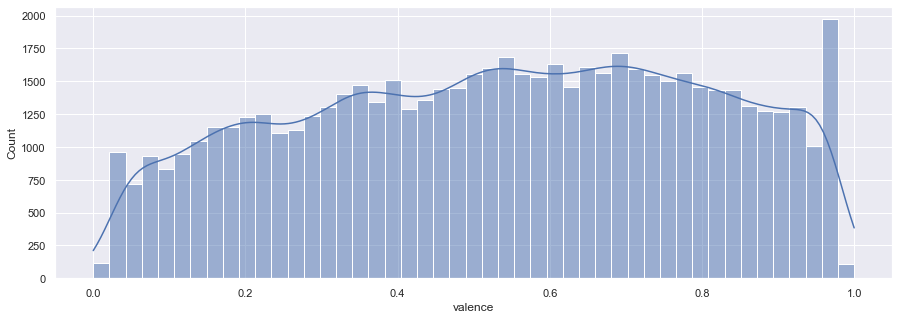

In [ ]:
plt.style.use('ggplot')
sns.set_theme()
plt.figure(figsize=(15,5))
sns.histplot(x='valence', data= tracks, kde=True)

- We notice that some songs have extremely low (valence lower than 0.02).
- Upon hearing those songs, we notice that they were not songs, but whispers or complete silence.
- We remove the songs with valence lower than 0.02.

In [ ]:
tracks = tracks.query('valence > 0.02')
tracks.reset_index(inplace=True, drop=True)

<AxesSubplot:xlabel='valence', ylabel='Count'>

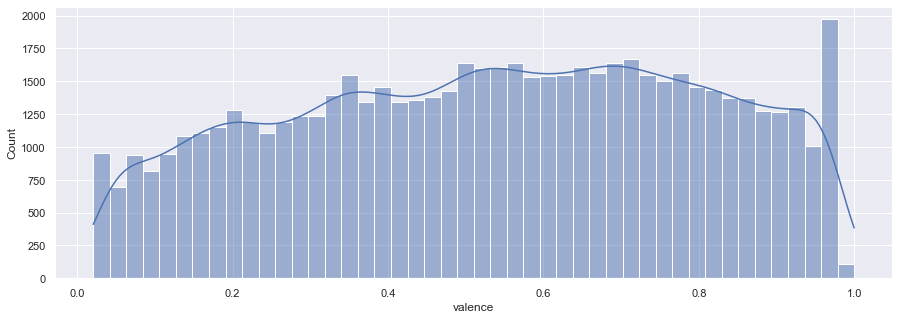

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='valence', data= tracks, kde=True)

<AxesSubplot:xlabel='valence'>

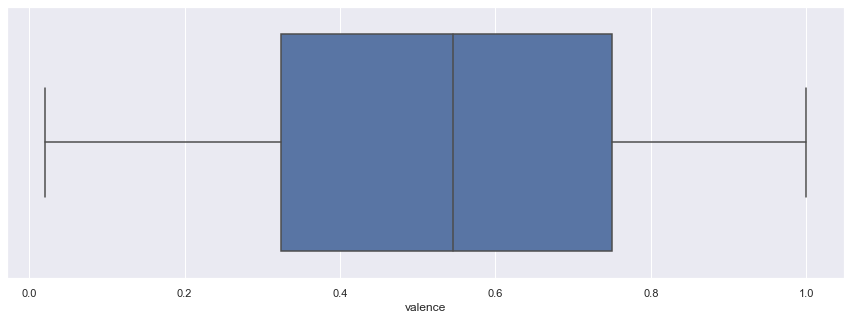

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='valence', data= tracks)

- As we can see from the histogram and boxplot, `valence` is fairly evenly distributed.
- We only notice one peak for values around 0.96-0.98.

## High-level Analysis (Audio Features)

Having understood our target variable, we will try and see how it reacts with our Audio Features. <br>
For all of our geatures we will use :
- Histogram
- BoxPlot
- Linear Regression (Valence undependent value)

Also, we note that even though outliers are found throughout the dataset, we consider them part of the problem, and we don't remove them from the dataset.

### Danceability

According to the Spotify API, `Danceability` is a metric that ranges from 0.0 to 1.0, and demonstrates how suitable a song is for dancing.<Br>
This metric takes into consideration elements including the beat, tempo, rhythm, and regularity.<br>
These variables are considered strong predictors of the valance of a song.

<AxesSubplot:xlabel='danceability', ylabel='Count'>

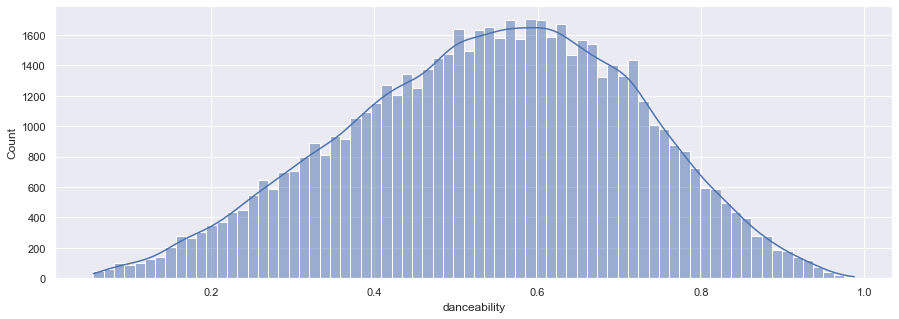

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='danceability', data= tracks, kde=True)

<AxesSubplot:xlabel='danceability'>

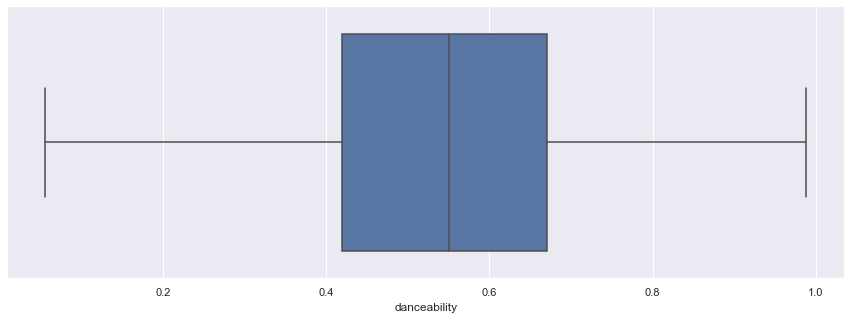

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='danceability', data= tracks)

- `Danceability` seems to follow a normal distribution, centered around 0.56.
- The spikes created across the diagram, are a result of rounding of the metric.

As said previously, `danceability` takes into consideration components of a song such as rhythm, tempo, and beat.
- Those parameters are found to be instrumental to the definition of a happy or sad song.
- We expect to see a relation between `danceability` and `valence`.
- First, let's see in a scatter Plot if any pattern forms.
- Because of the volume of our data (60.000), we will use hexbin with a black-red color map.

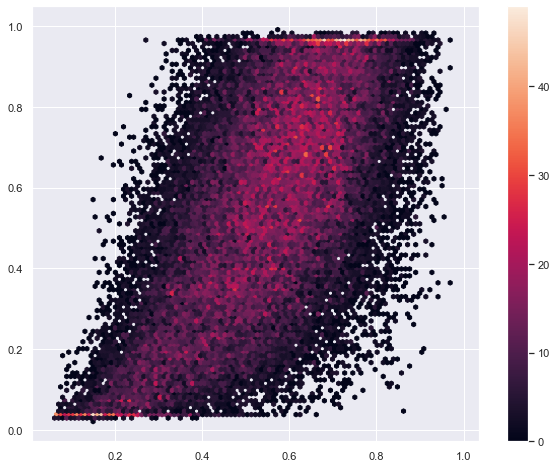

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['danceability'], y=tracks['valence'], bins=50, mincnt=2)
fig.colorbar(hb)

- We can see that a pattern seems to be forming, and the two variables seem to be linearly correlated.
- Lower values of `danceability` are correlated with lower values of `valance`,  and higher values of `danceability` are correlated with higher values of` valance`.

Note: The 2 horizontal lines formed around valence = 0.02 and valence = 0.96, are caused by the big number of songs that have valence equal to these values. This was depicted in the histogram of the valence.

We will test this hypothesis using linear Regression.

In [ ]:
mod = smf.ols("valence ~ danceability", data= tracks)
boston_res = mod.fit()
boston_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                 2.663e+04
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:59:34   Log-Likelihood:                 6333.4
No. Observations:               60963   AIC:                        -1.266e+04
Df Residuals:                   60961   BIC:                        -1.264e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0869      0.003     30.224      0.000       0.081       0.093
danceability     0.8243      0.005    163.201      0.000       0.814       0.834
==============================================================================
Omnibus:                      926.783   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.982
Skew:                          -0.034   Prob(JB):                    2.04e-118
Kurtosis:                       2.543   Cond. No.                         7.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- As we can see, `Danceabilty` seems to be a strong and significant predictor of `Valence`.

### Energy

According to the Spotify API, `energy` is a metric that ranges from 0.0 to 0.1, and measures the intensity, and activity of a song.
- High values of `energy`, are related to fast, loud, and noisy songs.
- Low values of `energy`, are related to low pace, and quiet songs.

<AxesSubplot:xlabel='energy', ylabel='Count'>

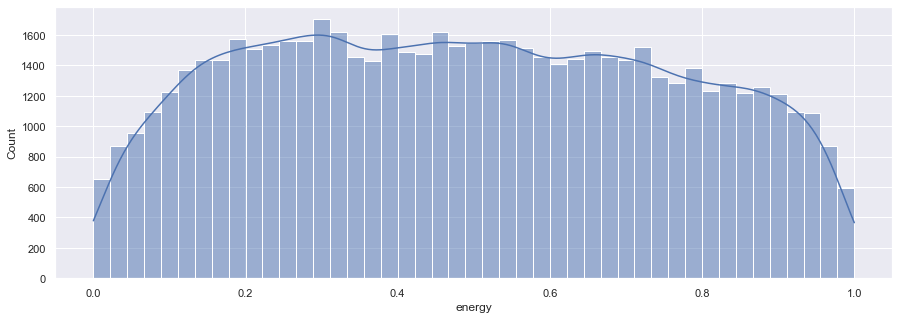

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='energy', data= tracks, kde=True)

<AxesSubplot:xlabel='energy'>

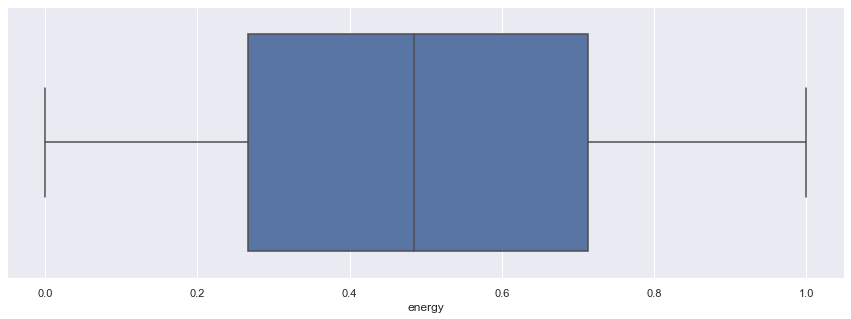

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='energy', data= tracks)

- `energy` has an even distribution, centered around 0.6 .

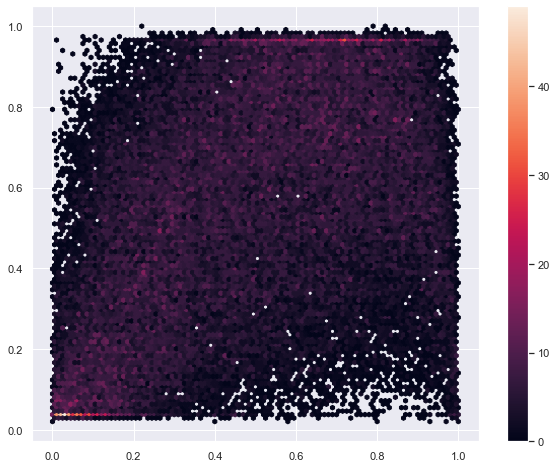

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['energy'], y=tracks['valence'], bins=50, mincnt=1)
fig.colorbar(hb)

- We don't see any clear pattern form this time.
- Before we use Linear Regression, we will use Pearson Correlation, to see if our 2 variables are linearly correlated.

In [ ]:
import scipy.stats.stats as stats

stats.pearsonr(tracks['valence'], tracks['energy'])

(0.34918979521200294, 0.0)

- The Pearson correlation shows that there is a low and positive correlation between the two variables.
- Let's now use linear Regression.


In [ ]:
mod = smf.ols("valence ~ energy", data= tracks)
boston_res = mod.fit()
boston_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     8465.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:59:35   Log-Likelihood:                -752.39
No. Observations:               60963   AIC:                             1509.
Df Residuals:                   60961   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3650      0.002    175.413      0.000       0.361       0.369
energy         0.3424      0.004     92.008      0.000       0.335       0.350
==============================================================================
Omnibus:                     8471.731   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2133.291
Skew:                          -0.086   Prob(JB):                         0.00
Kurtosis:                       2.100   Cond. No.                         4.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We can see that `energy` is significant, and explains 12.2% of the `valence` variance.

### Key

According to the Spotify API, `key` is the musical key the track is played on. Basically it maps integers to piches using standard Pitch Class notation.<br>
The mapping follows this:

- 0:'C_key'
- 1:'C_Sharp_key''
- 2:'D_key'
- 3:'D_Sharp_key'
- 4:'E_key'
- 5:'F_key'
- 6:'F_Sharp_key'
- 7:'G_key'
- 8:'G_Sharp_key'
- 9:'A_key'
- 10:'A_Sharp_key'
- 11:'B_key'



<AxesSubplot:xlabel='key', ylabel='Count'>

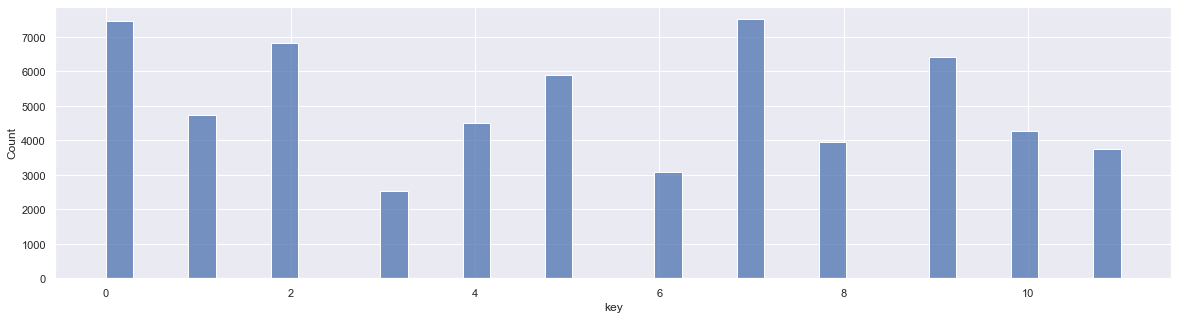

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(x='key', data= tracks)

- The mose used keys are C, D, G and A.
- From the hexbin plot, we don't see any relationship forming.
- According to music theory, there does not seem to be any coorelation between `key` and `valance`.
- Key is only relevent to pitch. So the existance of a key does not give us much information.

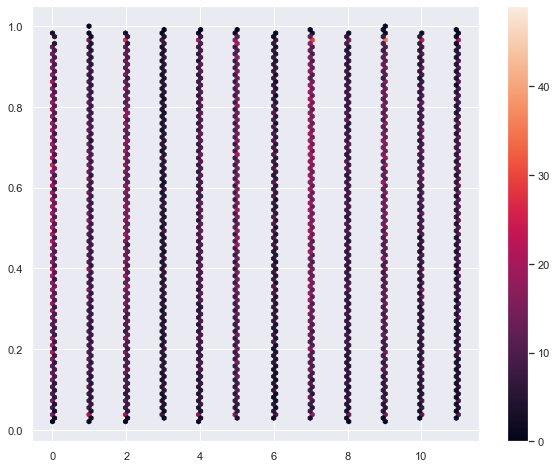

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['key'], y=tracks['valence'], bins=50, mincnt=1)
fig.colorbar(hb)


- The `key` variable is categorical, and takes values from 0 to 11. <BR>
- We will trasnform it to categorical using the C() encoding.

In [ ]:
mod = smf.ols('valence ~ C(key)', data= tracks)
boston_res = mod.fit()
boston_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     12.75
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           1.57e-24
Time:                        14:59:35   Log-Likelihood:                -4645.9
No. Observations:               60963   AIC:                             9316.
Df Residuals:                   60951   BIC:                             9424.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5363      0.003    177.494      0.000       0.530       0.542
C(key)[T.1]     -0.0305      0.005     -6.279      0.000      -0.040      -0.021
C(key)[T.2]     -0.0062      0.004     -1.422      0.155      -0.015       0.002
C(key)[T.3]     -0.0334      0.006     -5.566      0.000      -0.045      -0.022
C(key)[T.4]     -0.0068      0.005     -1.373      0.170      -0.016       0.003
C(key)[T.5]     -0.0022      0.005     -0.478      0.633      -0.011       0.007
C(key)[T.6]     -0.0046      0.006     -0.830      0.406      -0.016       0.006
C(key)[T.7]      0.0083      0.004      1.943      0.052   -7.29e-05       0.017
C(key)[T.8]     -0.0113      0.005     -2.199      0.028      -0.021      -0.001
C(key)[T.9]      0.0126      0.004      2.838      0.005       0.004       0.021
C(key)[T.10]     0.0037      0.005      0.736      0.462      -0.006       0.013
C(key)[T.11]     0.0079      0.005      1.517      0.129      -0.002       0.018
==============================================================================
Omnibus:                    19103.162   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2975.111
Skew:                          -0.123   Prob(JB):                         0.00
Kurtosis:                       1.946   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The regressions finds that most keys are isignificant to the `valence` of the song.
- What would actually be usefull, would be if we had the participation of each key in the song.
- We have access to this information from the audio analysis of each track.

- We will also create dummie variables.
- We do that because we might need them for later use in our predictive models.

In [ ]:
tracks_dummies = pd.get_dummies(tracks['key'])
tracks_dummies

0   1   2   3   4   5   6   7   8   9   10  11
0       0   0   0   0   0   0   0   1   0   0   0   0
1       0   0   0   0   0   0   0   0   0   1   0   0
2       0   0   0   0   0   0   0   1   0   0   0   0
3       0   0   0   0   0   0   0   0   0   0   1   0
4       0   0   0   0   0   1   0   0   0   0   0   0
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
60958   0   0   0   0   0   0   0   0   0   1   0   0
60959   0   0   0   0   1   0   0   0   0   0   0   0
60960   1   0   0   0   0   0   0   0   0   0   0   0
60961   1   0   0   0   0   0   0   0   0   0   0   0
60962   0   0   0   0   0   0   0   0   0   0   1   0

[60963 rows x 12 columns]

In [ ]:
# Rename The dummy columns.

tracks_dummies.rename(columns={
                            0:'C_key', 1:'C_Sharp_key',2:'D_key',
                            3:'D_Sharp_key', 4:'E_key', 5:'F_key',
                            6:'F_Sharp_key', 7:'G_key', 8:'G_Sharp_key',
                            9:'A_key', 10:'A_Sharp_key', 11:'B_key'
                        }, inplace= True)

In [ ]:
# Merge the 2 dataframes, and remove the old key column.

tracks = pd.merge(tracks,tracks_dummies, left_index=True, right_index=True)
tracks.drop(['key'],axis=1,inplace=True)
tracks.head()

index  danceability  energy  loudness  mode  speechiness  \
0  0AJfVstyUONRJhyYgTkHMR         0.253   0.385    -8.031     0       0.0341   
1  1V3NH8aYfFyRjfNOHgoX3G         0.219   0.222   -16.941     1       0.0390   
2  4kfEy7h6bWBS5OaDpccTap         0.846   0.651    -5.481     0       0.1280   
3  7qgM0MdETmhd3mORTqvJRm         0.398   0.255   -11.205     1       0.0373   
4  1HtgEaqki4dFclmVJlJDx1         0.612   0.579    -7.264     1       0.0269   

   acousticness  instrumentalness  liveness  valence  ...  D_key  D_Sharp_key  \
0         0.729          0.000000    0.0428   0.6460  ...      0            0   
1         0.978          0.000149    0.0837   0.0632  ...      0            0   
2         0.634          0.000000    0.1250   0.5810  ...      0            0   
3         0.944          0.000003    0.1140   0.3860  ...      0            0   
4         0.606          0.000009    0.3530   0.8100  ...      0            0   

   E_key  F_key  F_Sharp_key  G_key  G_Sharp_key  A_key  A_Sharp_key  B_key  
0      0      0            0      1            0      0            0      0  
1      0      0            0      0            0      1            0      0  
2      0      0            0      1            0      0            0      0  
3      0      0            0      0            0      0            1      0  
4      0      1            0      0            0      0            0      0  

[5 rows x 56 columns]

### Loudness

According to Spotify API, `loudness` represents the average Decibels (dB) of the song. The values range from -60 to 0.
Loudness, according to theory, is a significant predictor of happiness. <br>
Loudness is also related to the energy of a song, so we will have to check for multicollinearity issues.

<AxesSubplot:xlabel='loudness', ylabel='Count'>

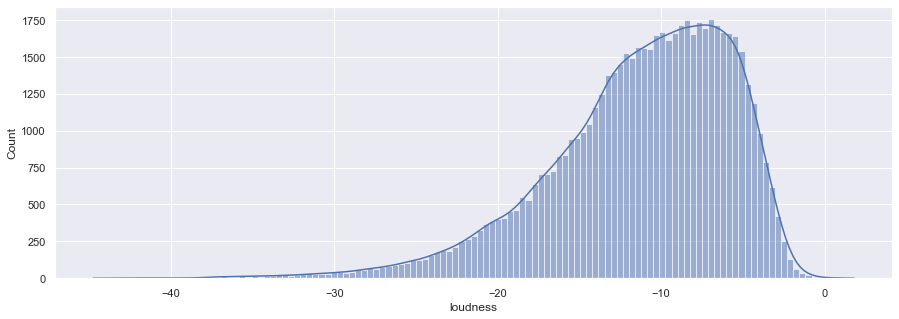

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='loudness', data= tracks, kde=True)

<AxesSubplot:xlabel='loudness'>

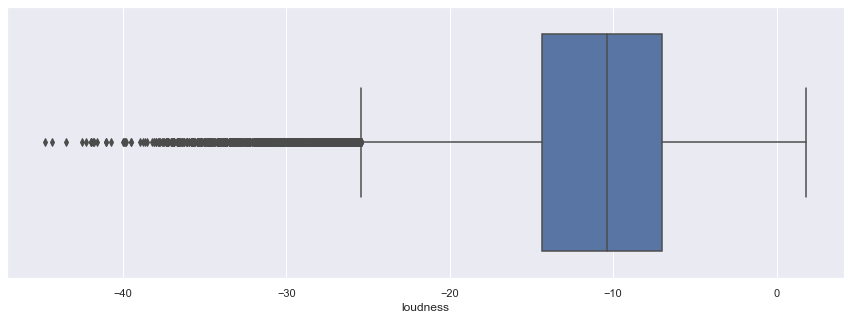

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='loudness', data= tracks)

- `loudness` primarily ranges from -25 to 0 decibels, with a mean of -10.
- As we can see from the boxplot, many songs have extremely low Decibel Values (High loudness), and are considered outliers.

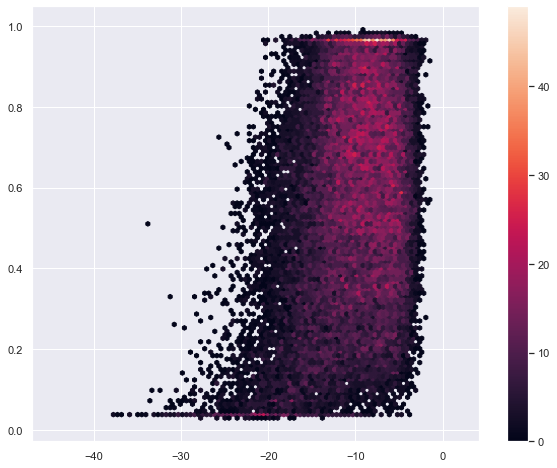

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['loudness'], y=tracks['valence'], bins=50, mincnt=3)
fig.colorbar(hb)

- Extremely low values of `loudness` are related to low values of `valence`. So our outliers have low `Valence`.
- For the rest of our values, we see a pattern being formed, but it is almost horizontal.
- We will test with Pearson and Linear Regression the relationship of these variables.
- As we suspected their relationship is significant.

In [ ]:
stats.pearsonr(tracks['valence'], tracks['loudness'])


(0.29778116669937976, 0.0)

In [ ]:
mod = smf.ols('valence ~ loudness', data= tracks)
boston_res = mod.fit()
boston_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     5932.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:59:37   Log-Likelihood:                -1885.7
No. Observations:               60963   AIC:                             3775.
Df Residuals:                   60961   BIC:                             3793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6893      0.002    304.470      0.000       0.685       0.694
loudness       0.0139      0.000     77.017      0.000       0.013       0.014
==============================================================================
Omnibus:                    12984.437   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2494.580
Skew:                          -0.052   Prob(JB):                         0.00
Kurtosis:                       2.015   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Mode

According to Spotify API, `mode` indicates the modularity (major or minor) of a track. <br>Major is presented with 1 and Minor with 0.

<AxesSubplot:xlabel='mode', ylabel='Count'>

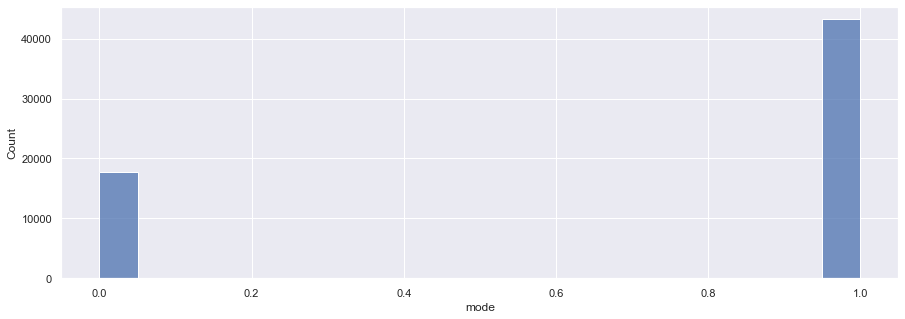

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='mode', data= tracks)

- Most of the songs are written in major scale.

In [ ]:
mod = smf.ols('valence ~ mode', data= tracks)
boston_res = mod.fit()
boston_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.21
Date:                Thu, 24 Feb 2022   Prob (F-statistic):            0.00140
Time:                        14:59:37   Log-Likelihood:                -4710.9
No. Observations:               60963   AIC:                             9426.
Df Residuals:                   60961   BIC:                             9444.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5280      0.002    269.120      0.000       0.524       0.532
mode           0.0074      0.002      3.195      0.001       0.003       0.012
==============================================================================
Omnibus:                    19608.863   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3002.691
Skew:                          -0.125   Prob(JB):                         0.00
Kurtosis:                       1.942   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The modularity of the song, according to the Adjusted R-Squared, has no relation with valence.
- This means that the valence is completely irrelevant to the scale of a song.

## Speechiness, Acousticness, Instrumentalness, and Liveness

According to Spotify API:
- `Speechiness`, detects the presence of spoken words in tracks.
- `Acousticness`, detects whether the track is acoustic.
- `Instrumentalness`, Predicts whether a track contains no vocals.
- `liveness`, Detects the presence of an audience in the recording (The track is from a live concert).

All of the above variables are measured from 0.0 to 1.0 <br>
In truth, these variables are binary, and their 0.0 to 1.0 values show the confidence that the Spotify API has for each value to be true.

<AxesSubplot:xlabel='speechiness', ylabel='Count'>

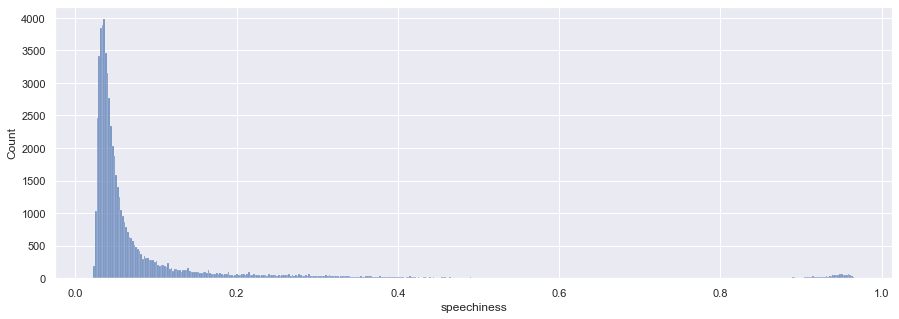

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='speechiness', data= tracks)

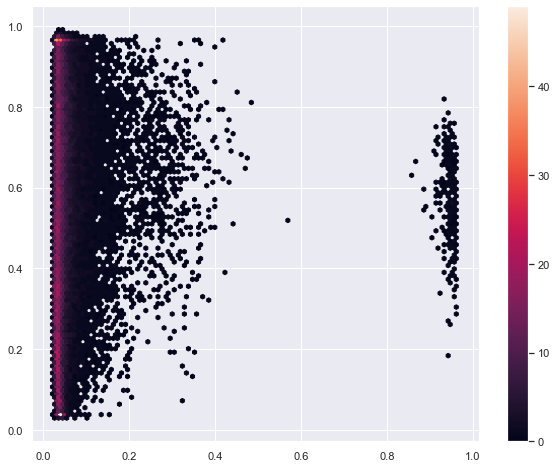

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['speechiness'], y=tracks['valence'], bins=50, mincnt=3)
fig.colorbar(hb)

- As we can see most of the tracks, have a value of speechiness close to 0.
- This means that most of our songs have little spoken words, and mainly music.

<AxesSubplot:xlabel='acousticness', ylabel='Count'>

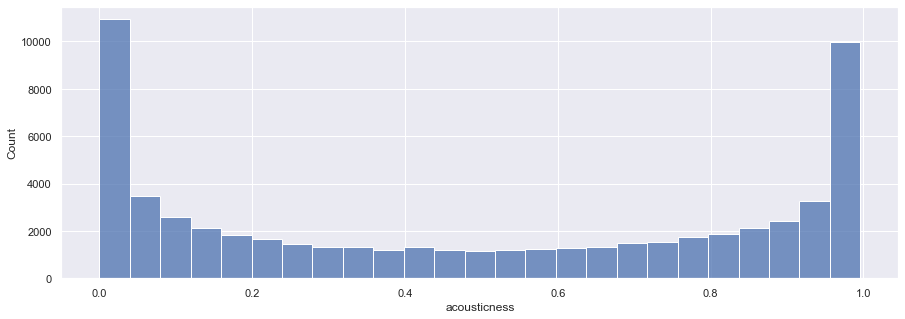

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='acousticness', data= tracks)

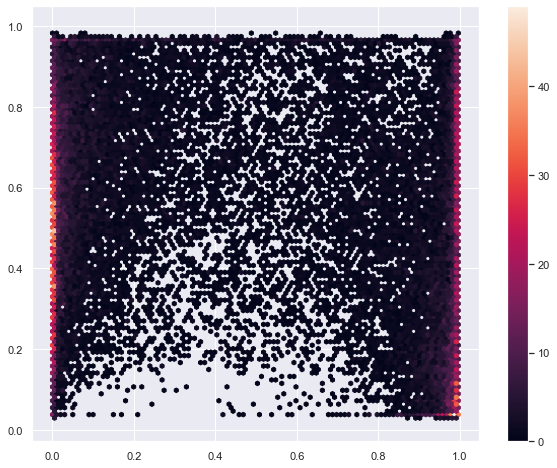

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['acousticness'], y=tracks['valence'], bins=50, mincnt=3)
fig.colorbar(hb)

- Our songs are equally distributed among acoustic and nonacoustic ones.

<AxesSubplot:xlabel='instrumentalness', ylabel='Count'>

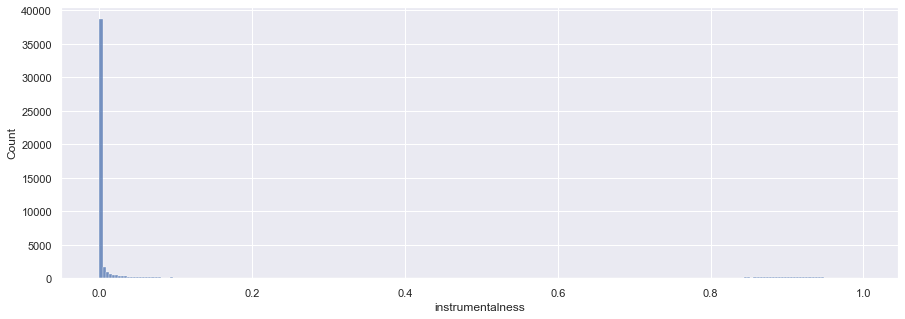

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='instrumentalness', data= tracks)

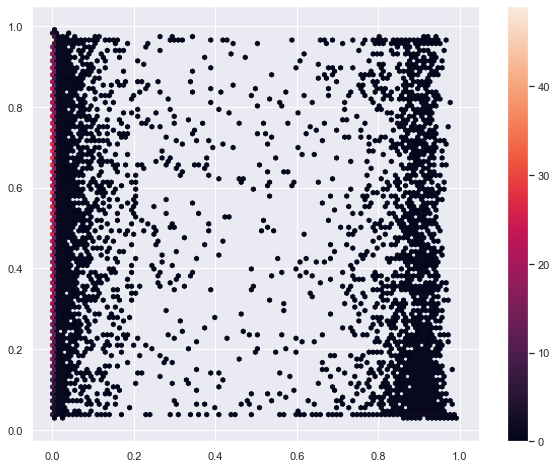

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['instrumentalness'], y=tracks['valence'], bins=50, mincnt=3)
fig.colorbar(hb)

- Our tracks are almost exclusively non-instrumental.
- This means that they contain some form of signing.

<AxesSubplot:xlabel='liveness', ylabel='Count'>

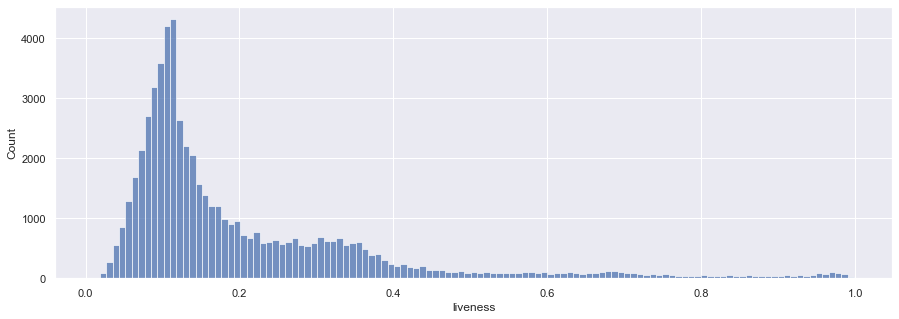

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='liveness', data= tracks)

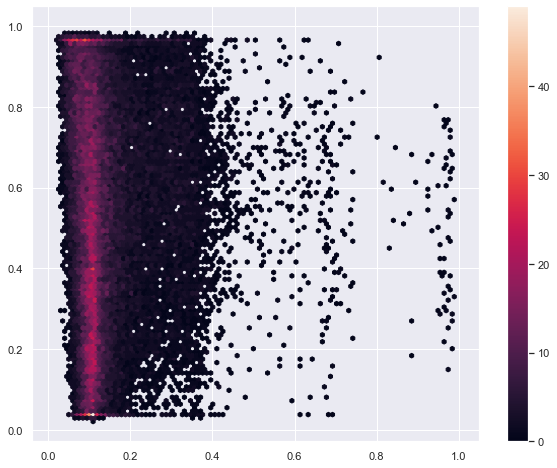

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['liveness'], y=tracks['valence'], bins=50, mincnt=3)
fig.colorbar(hb)

- Lastly the majority of our songs are not live.
- For all of our features we perform a multilinear regression.

In [ ]:
mod = smf.ols('valence ~ instrumentalness + acousticness + speechiness + liveness', data= tracks)
boston_res = mod.fit()
boston_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     835.7
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:59:40   Log-Likelihood:                -3088.7
No. Observations:               60963   AIC:                             6187.
Df Residuals:                   60958   BIC:                             6233.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5950      0.002    273.383      0.000       0.591       0.599
instrumentalness    -0.1146      0.004    -31.828      0.000      -0.122      -0.108
acousticness        -0.0947      0.003    -32.473      0.000      -0.100      -0.089
speechiness          0.0631      0.007      9.009      0.000       0.049       0.077
liveness            -0.0156      0.006     -2.623      0.009      -0.027      -0.004
==============================================================================
Omnibus:                    15194.168   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2616.603
Skew:                           0.000   Prob(JB):                         0.00
Kurtosis:                       1.985   Cond. No.                         8.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We see that the 4 features are found significant, but can only explain 5% of the `valence` varience.
- The biggest part is actually explained from the `acousticness` of a song.

In [ ]:
mod = smf.ols('valence ~ acousticness', data= tracks)
boston_res = mod.fit()
boston_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     2142.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:59:40   Log-Likelihood:                -3663.2
No. Observations:               60963   AIC:                             7330.
Df Residuals:                   60961   BIC:                             7348.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5959      0.002    349.096      0.000       0.593       0.599
acousticness    -0.1280      0.003    -46.285      0.000      -0.133      -0.123
==============================================================================
Omnibus:                    17134.226   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2758.846
Skew:                          -0.056   Prob(JB):                         0.00
Kurtosis:                       1.964   Cond. No.                         3.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Tempo

According to Spotify API, `tempo` measures the estimated tempo in BPM (beats per minute).<br>
In music theory, `tempo` is the speed or pace of a track.


<AxesSubplot:xlabel='tempo', ylabel='Count'>

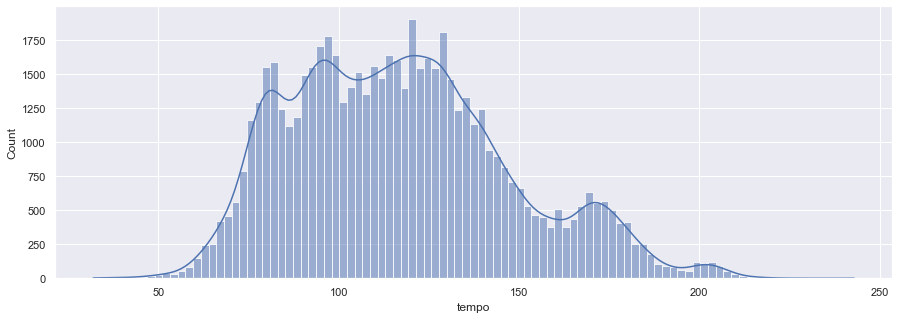

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='tempo', data= tracks, kde=1)

<AxesSubplot:xlabel='tempo'>

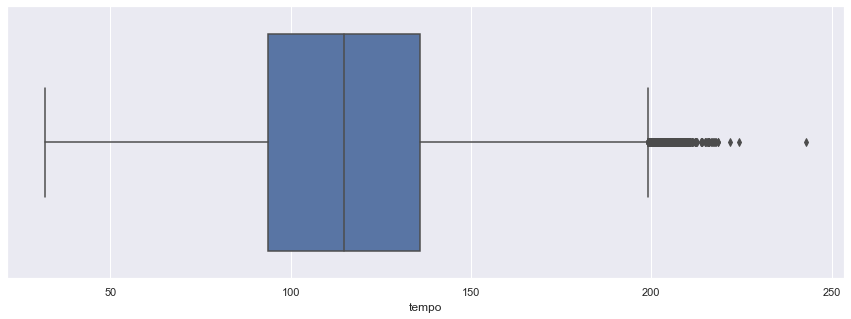

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='tempo', data= tracks)

- The average tempo of a song is around 120 beats per minute.
- We also notice some outliers that extremely high tempo.

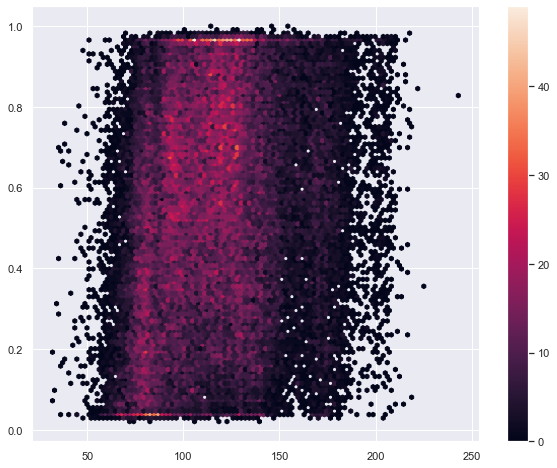

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['tempo'], y=tracks['valence'], bins=50, mincnt=1)
fig.colorbar(hb)

- We do not notice any clear pattern being formed.
- Lets test with Linear Regression.

In [ ]:
mod = smf.ols('valence ~ tempo', data= tracks)
boston_res = mod.fit()
boston_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1617.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:59:41   Log-Likelihood:                -3917.9
No. Observations:               60963   AIC:                             7840.
Df Residuals:                   60961   BIC:                             7858.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3720      0.004     89.795      0.000       0.364       0.380
tempo          0.0014   3.42e-05     40.215      0.000       0.001       0.001
==============================================================================
Omnibus:                    16685.551   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2826.775
Skew:                          -0.113   Prob(JB):                         0.00
Kurtosis:                       1.970   Cond. No.                         480.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- `tempo` does not seem to be an important predictor of `valence`

### Duration of the song

According to spotify API, `duration_ms` is the duration of the song in milliseconds.

<AxesSubplot:xlabel='duration_ms', ylabel='Count'>

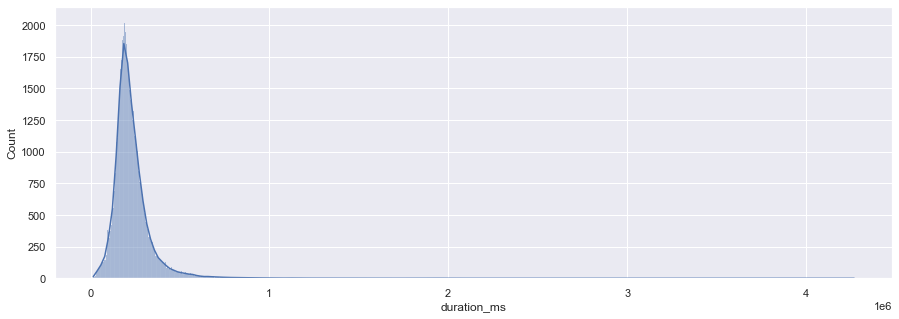

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='duration_ms', data= tracks, kde=1)

<AxesSubplot:xlabel='duration_ms'>

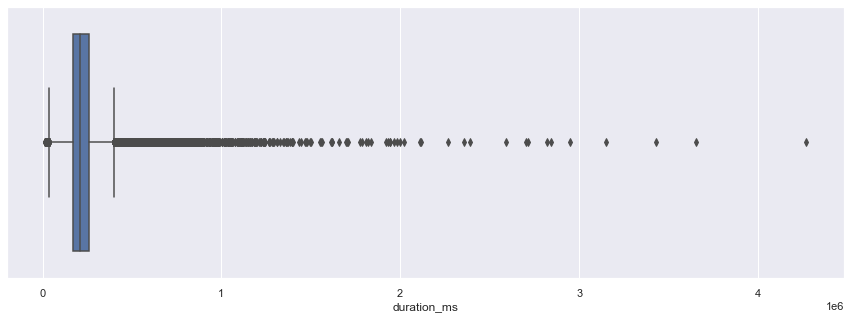

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='duration_ms', data= tracks)

- As we can see the average duration of a song is 0.2*1e6, or 200 seconds, or 3 minutes and 20 seconds.
- We notice that we have many outliers, which is natural, considering that the duration of a song has no limits.

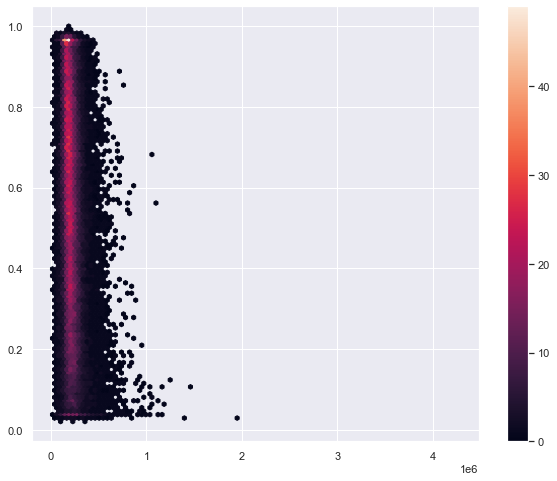

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['duration_ms'], y=tracks['valence'], bins=50, mincnt=2)
fig.colorbar(hb)

- Once again, the duration of a song seems to have little impact on our independent variable.

In [ ]:
mod = smf.ols('valence ~ duration_ms', data= tracks)
duration_res = mod.fit()
duration_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2585.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:59:43   Log-Likelihood:                -3450.1
No. Observations:               60963   AIC:                             6904.
Df Residuals:                   60961   BIC:                             6922.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6365      0.002    279.204      0.000       0.632       0.641
duration_ms -4.486e-07   8.82e-09    -50.843      0.000   -4.66e-07   -4.31e-07
==============================================================================
Omnibus:                    10627.458   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2394.218
Skew:                          -0.111   Prob(JB):                         0.00
Kurtosis:                       2.055   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Time Signature

According to the Spotify API, `time_signature` is a notation that describes how many beats are in one bar. It ranges from 3/4 to 7/4.
The `time_signature` is encoded with values from 1-5.
- 1 : 3/4
- 2 : 4/4
- 3 : 5/4
- 4 : 6/4
- 5 : 7/4

<AxesSubplot:xlabel='time_signature', ylabel='Count'>

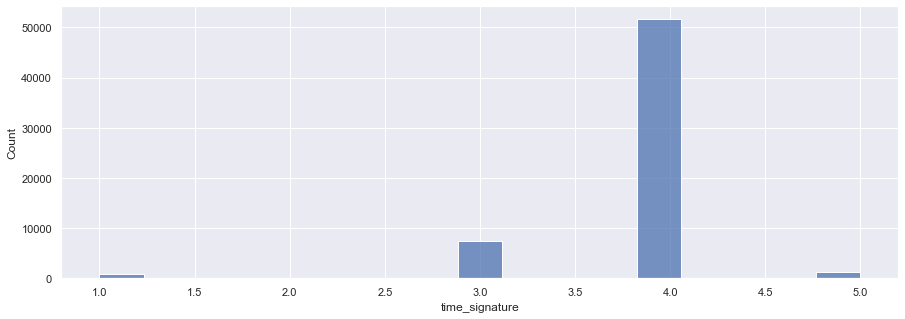

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='time_signature', data= tracks)

- Most songs use a 5/4 or 6/4 time signature.

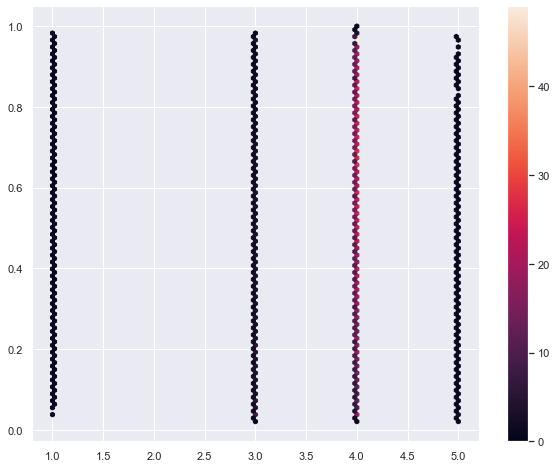

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['time_signature'], y=tracks['valence'], bins=50, mincnt=2)
fig.colorbar(hb)

- Because this is a categorical value, we create dummies variables.
- We also perform linear regression using the encoder.

In [ ]:
mod = smf.ols('valence ~ C(time_signature)', data= tracks)
duration_res = mod.fit()
duration_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     711.2
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:59:44   Log-Likelihood:                -3667.3
No. Observations:               60963   AIC:                             7343.
Df Residuals:                   60959   BIC:                             7379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4250      0.009     45.981      0.000       0.407       0.443
C(time_signature)[T.3]     0.0020      0.010      0.203      0.839      -0.017       0.021
C(time_signature)[T.4]     0.1286      0.009     13.808      0.000       0.110       0.147
C(time_signature)[T.5]    -0.0419      0.012     -3.536      0.000      -0.065      -0.019
==============================================================================
Omnibus:                    14034.938   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2659.954
Skew:                          -0.111   Prob(JB):                         0.00
Kurtosis:                       2.001   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
tracks_dummies_time_signature = pd.get_dummies(tracks['time_signature'])
tracks_dummies_time_signature.rename(columns={0:'no_beat', 1:'one_beat', 3:'three_beat', 4:'four_beat', 5:'five_beat'}, inplace=True)
tracks = pd.merge(tracks,tracks_dummies_time_signature, left_index=True, right_index=True)
tracks.drop('time_signature',axis=1, inplace=True)

In [ ]:
tracks

index  danceability  energy  loudness  mode  \
0      0AJfVstyUONRJhyYgTkHMR         0.253   0.385    -8.031     0   
1      1V3NH8aYfFyRjfNOHgoX3G         0.219   0.222   -16.941     1   
2      4kfEy7h6bWBS5OaDpccTap         0.846   0.651    -5.481     0   
3      7qgM0MdETmhd3mORTqvJRm         0.398   0.255   -11.205     1   
4      1HtgEaqki4dFclmVJlJDx1         0.612   0.579    -7.264     1   
...                       ...           ...     ...       ...   ...   
60958  4lUmnwRybYH7mMzf16xB0y         0.596   0.650    -5.167     1   
60959  1fzf9Aad4y1RWrmwosAK5y         0.588   0.850    -6.431     1   
60960  3E3pb3qH11iny6TFDJvsg5         0.754   0.660    -6.811     1   
60961  3yTkoTuiKRGL2VAlQd7xsC         0.584   0.836    -4.925     1   
60962  4JE6agBLHGA5TaF6FlqfBD         0.331   0.450    -5.362     1   

       speechiness  acousticness  instrumentalness  liveness  valence  ...  \
0           0.0341        0.7290          0.000000    0.0428   0.6460  ...   
1           0.0390        0.9780          0.000149    0.0837   0.0632  ...   
2           0.1280        0.6340          0.000000    0.1250   0.5810  ...   
3           0.0373        0.9440          0.000003    0.1140   0.3860  ...   
4           0.0269        0.6060          0.000009    0.3530   0.8100  ...   
...            ...           ...               ...       ...      ...  ...   
60958       0.3370        0.1380          0.000000    0.1400   0.1880  ...   
60959       0.0318        0.1680          0.002020    0.0465   0.7680  ...   
60960       0.2670        0.1790          0.000000    0.1940   0.3160  ...   
60961       0.0790        0.0558          0.000000    0.0663   0.4840  ...   
60962       0.0340        0.3650          0.004640    0.2200   0.1800  ...   

       F_Sharp_key  G_key  G_Sharp_key  A_key  A_Sharp_key  B_key  one_beat  \
0                0      1            0      0            0      0         0   
1                0      0            0      1            0      0         0   
2                0      1            0      0            0      0         0   
3                0      0            0      0            1      0         0   
4                0      0            0      0            0      0         0   
...            ...    ...          ...    ...          ...    ...       ...   
60958            0      0            0      1            0      0         0   
60959            0      0            0      0            0      0         0   
60960            0      0            0      0            0      0         0   
60961            0      0            0      0            0      0         0   
60962            0      0            0      0            1      0         0   

       three_beat  four_beat  five_beat  
0               0          1          0  
1               1          0          0  
2               0          1          0  
3               0          1          0  
4               0          1          0  
...           ...        ...        ...  
60958           0          1          0  
60959           0          1          0  
60960           0          1          0  
60961           0          1          0  
60962           0          1          0  

[60963 rows x 59 columns]

## Tracks Data

In this section, we analyze features that describe the song. This Features are:
- `year`, the year the song was released.
- `explicit`, if it contains explicit lyrics
- `popularity`, the songs popularity.

### Year

The `year` that the song was released on. This was extracted from the `release_date` that the Spotify API provides us.

<AxesSubplot:xlabel='year', ylabel='Count'>

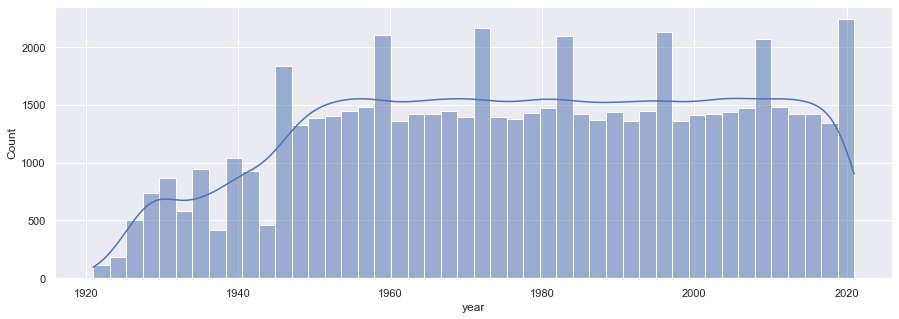

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='year', data= tracks, kde=1)

- Our data set is diverge, contains songs from 1920 to 2020.
- Also it is evenly distributed for the most part.
- We notice a spike every 4-5 years.
- This might be a new music genre getting famous.

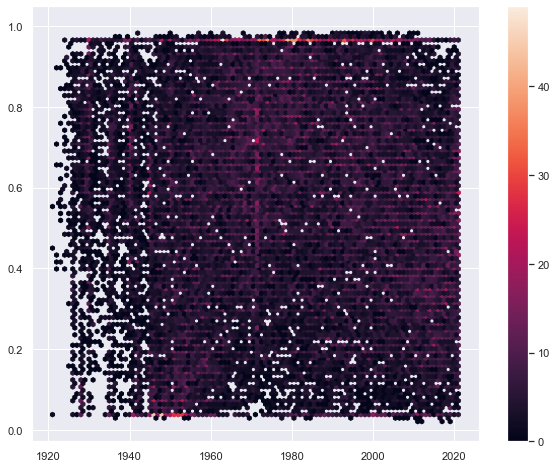

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['year'], y=tracks['valence'], bins=50, mincnt=2)
fig.colorbar(hb)

- The pattern that forms seems to be mostly random.

In [ ]:
mod = smf.ols('valence ~  year', data= tracks)
duration_res = mod.fit()
duration_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     48.36
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           3.59e-12
Time:                        14:59:44   Log-Likelihood:                -4691.8
No. Observations:               60963   AIC:                             9388.
Df Residuals:                   60961   BIC:                             9406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0946      0.081     13.558      0.000       0.936       1.253
year          -0.0003   4.08e-05     -6.954      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    18437.072   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2955.243
Skew:                          -0.128   Prob(JB):                         0.00
Kurtosis:                       1.952   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Even though the `year` is significant, it does not explain the variance of `valence`.

### Explicit

According to the Spotify API, `explicit` is a boolean variable, that is true (1) if the song contains explicit words.

<AxesSubplot:xlabel='explicit', ylabel='Count'>

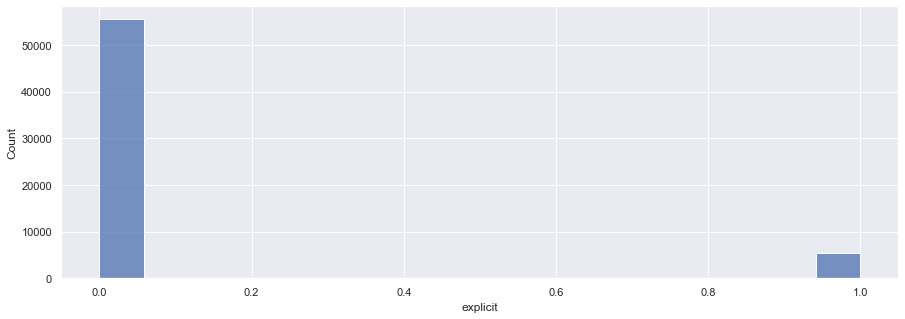

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='explicit', data= tracks)

- Most of the songs dont contain explicit words.

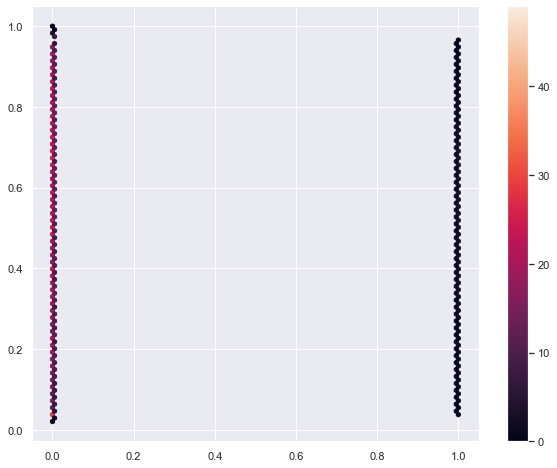

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['explicit'], y=tracks['valence'], bins=50, mincnt=2)
fig.colorbar(hb)

In [ ]:
mod = smf.ols('valence ~ explicit', data= tracks)
duration_res = mod.fit()
duration_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     39.47
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           3.35e-10
Time:                        14:59:45   Log-Likelihood:                -4696.3
No. Observations:               60963   AIC:                             9397.
Df Residuals:                   60961   BIC:                             9415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5354      0.001    482.365      0.000       0.533       0.538
explicit      -0.0232      0.004     -6.283      0.000      -0.030      -0.016
==============================================================================
Omnibus:                    19348.904   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3008.746
Skew:                          -0.132   Prob(JB):                         0.00
Kurtosis:                       1.944   Cond. No.                         3.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- As we can see, `explicit` fails to explain `valence`, but is significant.

## Popularity

According to the Spotify API, `popularity` measures the song's popularity on a scale of 0 to 100.

<AxesSubplot:xlabel='popularity', ylabel='Count'>

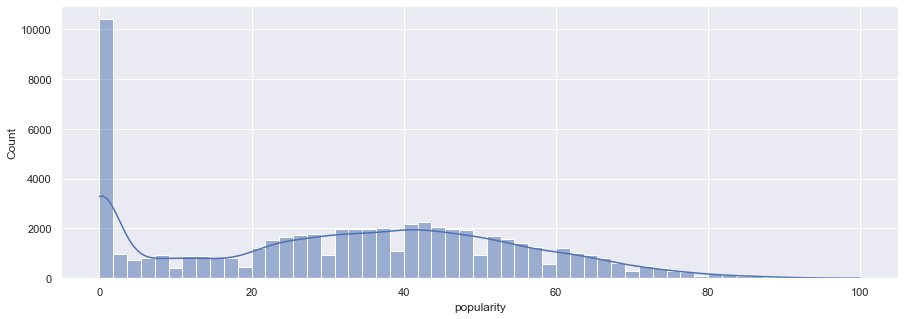

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x='popularity', data= tracks, kde=1)

- Most songs in our dataset are unpopular.
- Besides the songs with 0 popularity, we see that we have even distribution for values 1 to 60.

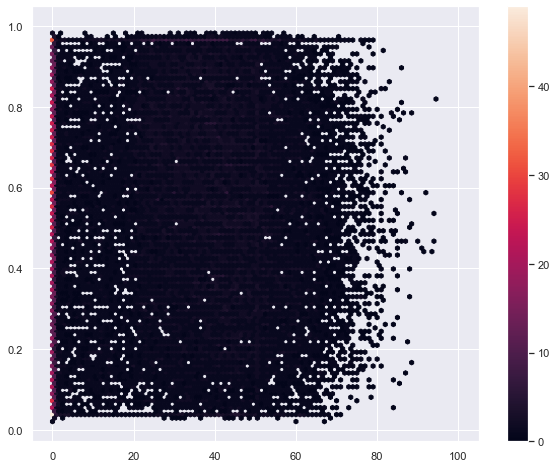

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['popularity'], y=tracks['valence'], bins=50, mincnt=2)
fig.colorbar(hb)

In [ ]:
mod = smf.ols('valence ~  popularity', data= tracks)
duration_res = mod.fit()
duration_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.801
Date:                Thu, 24 Feb 2022   Prob (F-statistic):            0.00301
Time:                        14:59:45   Log-Likelihood:                -4711.6
No. Observations:               60963   AIC:                             9427.
Df Residuals:                   60961   BIC:                             9445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5287      0.002    282.743      0.000       0.525       0.532
popularity     0.0001   4.78e-05      2.967      0.003    4.81e-05       0.000
==============================================================================
Omnibus:                    19823.826   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3006.388
Skew:                          -0.122   Prob(JB):                         0.00
Kurtosis:                       1.940   Cond. No.                         69.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Once more, popularity fails to explain `valence`, and is relatively significant.
- All the Track details variables did not seem to have a big effect on `valence`.

## Low-level Analysis

In this part, we are going to analyze the variables that we took from the *Audio Analysis* of each track.<br>
For a detailed analysis of how we extract and handle each variable, we urge you to check `Spotify_API.ipynb`.

All the features of the audio analysis, come from the *segments* of each track. Each track contains up to 1000 or more segments and each segment has its values for all the features we analyze (Timbre, Pitch, and Loudness).

We took the average value for each track, across all the segments of a song.


### Pitch

According to the Spotify API, `pitch` is presented as a vector to the 12 pitch classes (C,C#,..,B), with values ranging from 0 to 1. <br>
This values describe the dominance of each pitch in the chromatic scale.

- To better understand it's impact, we will perform a regresssion, using the whole vector of pitch.

In [ ]:
all_keys = list(tracks.loc[:,'C_key_per':'B_key_per'].columns)
all_keys_formula = "valence ~ " + '+'.join(all_keys)
all_keys_formula

'valence ~ C_key_per+C_Sharp_key_per+D_key_per+D_Sharp_key_per+E_key_per+F_key_per+F_Sharp_key_per+G_key_per+G_Sharp_key_per+A_key_per+A_Sharp_key_per+B_key_per'

In [ ]:
mod = smf.ols(all_keys_formula, data= tracks)
duration_res = mod.fit()
duration_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     571.0
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:59:46   Log-Likelihood:                -1468.6
No. Observations:               60963   AIC:                             2963.
Df Residuals:                   60950   BIC:                             3080.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0849      0.006     14.594      0.000       0.074       0.096
C_key_per          -0.0862      0.012     -7.175      0.000      -0.110      -0.063
C_Sharp_key_per     0.0979      0.013      7.546      0.000       0.072       0.123
D_key_per           0.1356      0.014      9.490      0.000       0.108       0.164
D_Sharp_key_per     0.1069      0.016      6.695      0.000       0.076       0.138
E_key_per          -0.1090      0.014     -7.678      0.000      -0.137      -0.081
F_key_per           0.3077      0.014     22.412      0.000       0.281       0.335
F_Sharp_key_per    -0.1181      0.015     -7.685      0.000      -0.148      -0.088
G_key_per           0.2032      0.014     14.981      0.000       0.177       0.230
G_Sharp_key_per     0.1515      0.015     10.063      0.000       0.122       0.181
A_key_per           0.2139      0.014     14.909      0.000       0.186       0.242
A_Sharp_key_per    -0.0240      0.016     -1.526      0.127      -0.055       0.007
B_key_per           0.5115      0.014     35.802      0.000       0.483       0.539
==============================================================================
Omnibus:                     4362.732   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.149
Skew:                          -0.086   Prob(JB):                         0.00
Kurtosis:                       2.240   Cond. No.                         46.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The `pitch` explains the variance of valence by 10%.
- The only key of pitch that seems insignificant is A_Sharp_key_per.

### Timbre Vector


According to the Spotify API, `timbre` is the quality of a musical note or sound that distinguishes different types of musical instruments or voices.<br> It is a result of a PCA analysis and it is a vector of 12 unbounded values roughly centered around 0.<br>
The Spotify documentation only explains the first 4 dimensions, which are:
- Loudness of a track.
- Brightness of sound.
- Flatness of sound.
- Sounds with a stronger attack.


- As we did with the `pitch` vector, we will perform regression with the `timbre` vector.

In [ ]:
all_keys = list(tracks.loc[:,'timbre_frist_dim':'timbre_twelveth_dim'].columns)
all_keys_formula = "valence ~ " + '+'.join(all_keys)
all_keys_formula

'valence ~ timbre_frist_dim+timbre_second_dim+timbre_third_dim+timbre_fourth_dim+timbre_fifth_dim+timbre_sixth_dim+timbre_seventh_dim+timbre_eighth_dim+timbre_ninenth_dim+timbre_tenth_dim+timbre_eleventh_dim+timbre_twelveth_dim'

In [ ]:
mod = smf.ols(all_keys_formula, data= tracks)
duration_res = mod.fit()
duration_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     3851.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:59:46   Log-Likelihood:                 12485.
No. Observations:               60963   AIC:                        -2.494e+04
Df Residuals:                   60950   BIC:                        -2.483e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.3995      0.010     38.867      0.000       0.379       0.420
timbre_frist_dim        0.0152      0.000     87.683      0.000       0.015       0.016
timbre_second_dim       0.0006   2.21e-05     29.004      0.000       0.001       0.001
timbre_third_dim       -0.0039   3.95e-05    -98.400      0.000      -0.004      -0.004
timbre_fourth_dim       0.0081   7.13e-05    113.015      0.000       0.008       0.008
timbre_fifth_dim        0.0009   5.48e-05     16.692      0.000       0.001       0.001
timbre_sixth_dim        0.0137      0.000     94.442      0.000       0.013       0.014
timbre_seventh_dim      0.0022   9.38e-05     23.072      0.000       0.002       0.002
timbre_eighth_dim       0.0016      0.000     10.274      0.000       0.001       0.002
timbre_ninenth_dim      0.0021      0.000     17.592      0.000       0.002       0.002
timbre_tenth_dim        0.0031      0.000     12.510      0.000       0.003       0.004
timbre_eleventh_dim     0.0230      0.000     64.272      0.000       0.022       0.024
timbre_twelveth_dim    -0.0018      0.000    -12.128      0.000      -0.002      -0.002
==============================================================================
Omnibus:                       80.158   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.243
Skew:                          -0.070   Prob(JB):                     1.69e-17
Kurtosis:                       2.895   Cond. No.                         860.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We can see that the `timbre` vector explains 43% of the total variance of `valence`.
- The reason behind that is that `timbre` explains the sound of a song using PCA.
- The 12 values are the 12 most important features of the PCA analysis performed on the track by Spotify.
- Also, all 12 values of `timbre` are significant.

### Loudness_start

According to Spotify API, `loudness_start` is the loudness of the segment of a track when it starts.<br>
Through our analysis in `Spotify_API.ipynb`, we kept the average starting loudness for all segments.

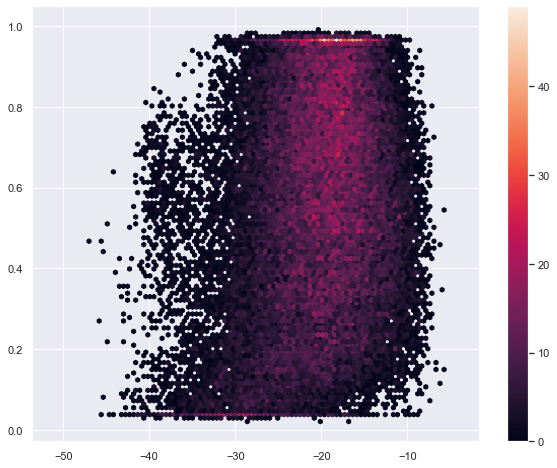

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['loudness_start'], y=tracks['valence'], bins=50, mincnt=2)
fig.colorbar(hb)

In [ ]:
mod = smf.ols('valence ~ loudness_start', data= tracks)
duration_res = mod.fit()
duration_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2357.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:59:46   Log-Likelihood:                -3559.6
No. Observations:               60963   AIC:                             7123.
Df Residuals:                   60961   BIC:                             7141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6885      0.003    204.808      0.000       0.682       0.695
loudness_start     0.0073      0.000     48.550      0.000       0.007       0.008
==============================================================================
Omnibus:                    20872.545   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2965.161
Skew:                          -0.076   Prob(JB):                         0.00
Kurtosis:                       1.930   Cond. No.                         72.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The `loudness_start` variable only explains 3% of the `valence` variance while remaining significant.

### Loudness_max

According to Spotify API, `loudness_max` is the maximum loudness of the segment of a track when it starts.<br>
We kept the average maximum loudness for all segments.

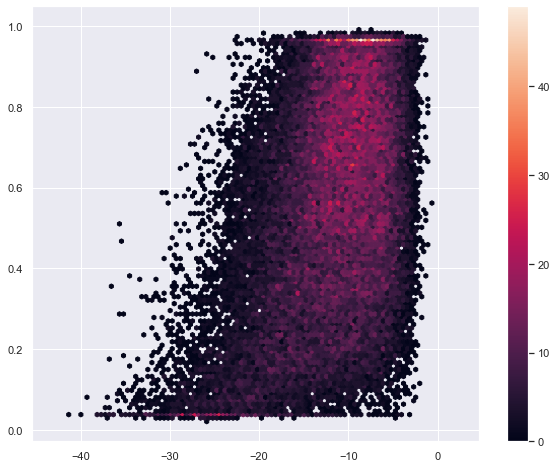

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['loudness_max'], y=tracks['valence'], bins=50, mincnt=2)
fig.colorbar(hb)

- For `loudnes_max` a pattern seems to be forming, which reminds us of the pattern that loudness formed.
- Of course, `loudness` is correlated with all the features discussing DB.
- Let's check the correlation between `valence` and `loudnes_max` via linear regression.

In [ ]:
mod = smf.ols('valence ~ loudness_max', data= tracks)
duration_res = mod.fit()
duration_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                 1.094e+04
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:59:46   Log-Likelihood:                 316.46
No. Observations:               60963   AIC:                            -628.9
Df Residuals:                   60961   BIC:                            -610.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7377      0.002    337.754      0.000       0.733       0.742
loudness_max     0.0162      0.000    104.609      0.000       0.016       0.017
==============================================================================
Omnibus:                     7691.694   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2010.932
Skew:                          -0.061   Prob(JB):                         0.00
Kurtosis:                       2.119   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- `loudness_max` explains a big proporsion of the valence, at 15%.

### Loudness_max_time

According to Spotify API, `loudness_max_time` is the offset of the segment peak loudness in seconds. <br>
It is also used to describe the attack of a song.

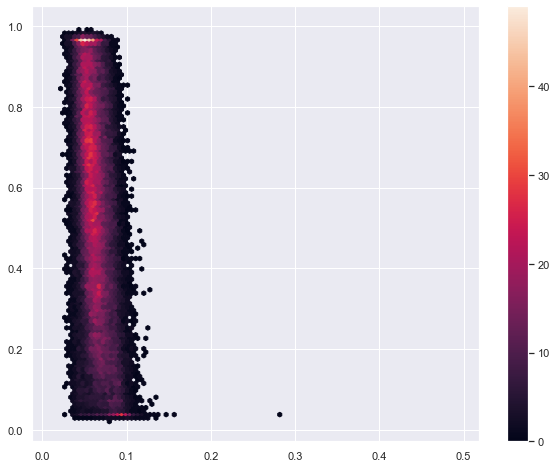

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['loudness_max_time'], y=tracks['valence'], bins=50, mincnt=2)
fig.colorbar(hb)

- It looks like `loudness_max_time` and `valence` are inversely associated.
- Songs with a weaker attack have higher valence.
- Songs with a stronger attack have lower valence.

In [ ]:
mod = smf.ols('valence ~ loudness_max_time', data= tracks)
duration_res = mod.fit()
duration_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                 1.023e+04
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:59:47   Log-Likelihood:                 13.382
No. Observations:               60963   AIC:                            -22.76
Df Residuals:                   60961   BIC:                            -4.728
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9358      0.004    228.325      0.000       0.928       0.944
loudness_max_time    -6.2431      0.062   -101.152      0.000      -6.364      -6.122
==============================================================================
Omnibus:                     1238.454   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              733.244
Skew:                          -0.107   Prob(JB):                    6.00e-160
Kurtosis:                       2.507   Cond. No.                         63.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We also notice the negative association through the coefficient of loudness_max, which is negative.
- Also loudness_max explains the model by 14%.

### Loudness_end

According to Spotify API, `loudness_end` is the loudness of the segment of a track when it ends.<br>
Through our analysis in `Spotify_API.ipynb`, we kept the average ending loudness for all segments.

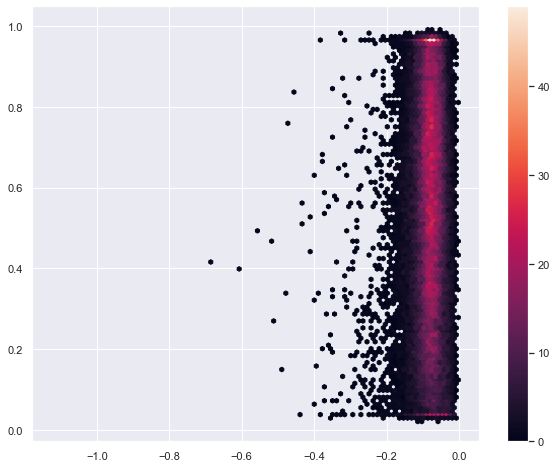

In [ ]:
fig = plt.figure(figsize=(10, 8))
hb = plt.hexbin(tracks['loudness_end'], y=tracks['valence'], bins=50, mincnt=2)
fig.colorbar(hb)

In [ ]:
mod = smf.ols('valence ~ loudness_end', data= tracks)
duration_res = mod.fit()
duration_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     104.6
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           1.54e-24
Time:                        14:59:47   Log-Likelihood:                -4663.7
No. Observations:               60963   AIC:                             9331.
Df Residuals:                   60961   BIC:                             9349.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5512      0.002    269.407      0.000       0.547       0.555
loudness_end     0.2081      0.020     10.229      0.000       0.168       0.248
==============================================================================
Omnibus:                    18908.195   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2963.958
Skew:                          -0.122   Prob(JB):                         0.00
Kurtosis:                       1.948   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Both the average loudness at the end and the start of a segment, did not seem to explain `valence`.
- On the other hand, the maximum loudness and its duration seem to be significant to `valence`

## Multi-linear Regression


Having analyzed, and understoud our features, we will perform a Multi-linear Regression, in order to find the best model to explain the `valance` of a song. <br>


- We remove the `index` (song_id) of the track because we dont need it in the multi-linear regression.

In [ ]:
tracks_no_id = tracks.drop('index', axis=1)

In [ ]:
tracks_no_id

danceability  energy  loudness  mode  speechiness  acousticness  \
0             0.253   0.385    -8.031     0       0.0341        0.7290   
1             0.219   0.222   -16.941     1       0.0390        0.9780   
2             0.846   0.651    -5.481     0       0.1280        0.6340   
3             0.398   0.255   -11.205     1       0.0373        0.9440   
4             0.612   0.579    -7.264     1       0.0269        0.6060   
...             ...     ...       ...   ...          ...           ...   
60958         0.596   0.650    -5.167     1       0.3370        0.1380   
60959         0.588   0.850    -6.431     1       0.0318        0.1680   
60960         0.754   0.660    -6.811     1       0.2670        0.1790   
60961         0.584   0.836    -4.925     1       0.0790        0.0558   
60962         0.331   0.450    -5.362     1       0.0340        0.3650   

       instrumentalness  liveness  valence    tempo  ...  F_Sharp_key  G_key  \
0              0.000000    0.0428   0.6460  203.512  ...            0      1   
1              0.000149    0.0837   0.0632   72.999  ...            0      0   
2              0.000000    0.1250   0.5810  140.048  ...            0      1   
3              0.000003    0.1140   0.3860   83.883  ...            0      0   
4              0.000009    0.3530   0.8100  136.641  ...            0      0   
...                 ...       ...      ...      ...  ...          ...    ...   
60958          0.000000    0.1400   0.1880  133.997  ...            0      0   
60959          0.002020    0.0465   0.7680   93.003  ...            0      0   
60960          0.000000    0.1940   0.3160   83.000  ...            0      0   
60961          0.000000    0.0663   0.4840  104.973  ...            0      0   
60962          0.004640    0.2200   0.1800  123.829  ...            0      0   

       G_Sharp_key  A_key  A_Sharp_key  B_key  one_beat  three_beat  \
0                0      0            0      0         0           0   
1                0      1            0      0         0           1   
2                0      0            0      0         0           0   
3                0      0            1      0         0           0   
4                0      0            0      0         0           0   
...            ...    ...          ...    ...       ...         ...   
60958            0      1            0      0         0           0   
60959            0      0            0      0         0           0   
60960            0      0            0      0         0           0   
60961            0      0            0      0         0           0   
60962            0      0            1      0         0           0   

       four_beat  five_beat  
0              1          0  
1              0          0  
2              1          0  
3              1          0  
4              1          0  
...          ...        ...  
60958          1          0  
60959          1          0  
60960          1          0  
60961          1          0  
60962          1          0  

[60963 rows x 58 columns]

- To find the best model for our 57 features we will use *Forward Selection*.
- *Forward Selection* finds the best model for each number of features, according to adjusted R-Squared,and returns the best.

# Forward selection

In [ ]:
#  This function was produced by: Professor P.louridas and is part of the course 'Applied Machine Learning' of AUEB.

def forward_add_variable(data, exog, selected, to_select):
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]

    for column in to_select:
        new_selected = selected + [column]
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column

    return best_model, best_column

def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].values
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr

In [ ]:
#  This function was produced by: Professor P.louridas and is part of the course 'Applied Machine Learning' of AUEB.

def forward_stepwise_selection(data, exog):

    best_models = []
    best_model = None
    selected = []
    to_select = [ x for x in data.columns if x != exog ]

    p = len(to_select) + 1

    for i in range(1, p):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model, best_column = forward_add_variable(data, exog, selected, to_select)
        selected.append(best_column)
        to_select.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected)
        best_models.append(model)

    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

- Having set our function, we find the model that best explains `valence` with our 57 features.

In [ ]:
best_model, best_models = forward_stepwise_selection(tracks_no_id, 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 1 variable
['danceability']
Finding the best model for 2 variables
['danceability', 'loudness_max']
Finding the best model for 3 variables
['danceability', 'loudness_max', 'loudness']
Finding the best model for 4 variables
['danceability', 'loudness_max', 'loudness', 'year']
Finding the best model for 5 variables
['danceability', 'loudness_max', 'loudness', 'year', 'loudness_max_time']
Finding the best model for 6 variables
['danceability', 'loudness_max', 'loudness', 'year', 'loudness_max_time', 'timbre_sixth_dim']
Finding the best model for 7 variables
['danceability', 'loudness_max', 'loudness', 'year', 'loudness_max_time', 'timbre_sixth_dim', 'explicit']
Finding the best model for 8 variables
['danceability', 'loudness_max', 'loudness', 'year', 'loudness_max_time', 'timbre_sixth_dim', 'explicit', 'energy']
Finding the best model for 9 variables
['danceability', 'loudness_max', 'loudness', 'year', 'loudness_max_time', 'timbre_sixth_dim', 'explicit', 'energ

In [ ]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     2050.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:01:53   Log-Likelihood:                 24982.
No. Observations:               60963   AIC:                        -4.986e+04
Df Residuals:                   60913   BIC:                        -4.941e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.8474      0.209      4.062      0.000       0.438       1.256
danceability            0.3916      0.008     48.606      0.000       0.376       0.407
loudness_max            0.0535      0.002     26.991      0.000       0.050       0.057
loudness               -0.0501      0.001    -90.183      0.000      -0.051      -0.049
year                   -0.0015   5.84e-05    -26.487      0.000      -0.002      -0.001
loudness_max_time      -2.2749      0.083    -27.427      0.000      -2.437      -2.112
timbre_sixth_dim        0.0048      0.000     26.648      0.000       0.004       0.005
explicit               -0.0770      0.003    -27.379      0.000      -0.083      -0.072
energy                  0.2216      0.010     23.078      0.000       0.203       0.240
speechiness            -0.2408      0.008    -31.337      0.000      -0.256      -0.226
duration_ms         -1.801e-07   6.96e-09    -25.866      0.000   -1.94e-07   -1.66e-07
tempo                   0.0005    2.3e-05     22.590      0.000       0.000       0.001
timbre_fifth_dim        0.0008   5.19e-05     14.654      0.000       0.001       0.001
C_Sharp_key_per        -0.1127      0.009    -12.159      0.000      -0.131      -0.095
timbre_second_dim       0.0006   2.55e-05     24.262      0.000       0.001       0.001
loudness_start         -0.0456      0.002    -23.237      0.000      -0.049      -0.042
timbre_eleventh_dim     0.0102      0.000     29.301      0.000       0.009       0.011
B_key_per               0.2057      0.009     21.867      0.000       0.187       0.224
G_Sharp_key_per         0.1241      0.010     11.904      0.000       0.104       0.145
D_key_per               0.1014      0.010     10.552      0.000       0.083       0.120
timbre_frist_dim        0.0416      0.003     15.144      0.000       0.036       0.047
timbre_seventh_dim      0.0017   9.11e-05     18.736      0.000       0.002       0.002
timbre_fourth_dim      -0.0009      0.000     -5.365      0.000      -0.001      -0.001
acousticness            0.0577      0.005     12.188      0.000       0.048       0.067
timbre_twelveth_dim    -0.0014      0.000     -9.557      0.000      -0.002      -0.001
F_key_per               0.0831      0.009      9.141      0.000       0.065       0.101
C_key_per              -0.1174      0.008    -13.927      0.000      -0.134      -0.101
E_key_per              -0.0576      0.008     -7.025      0.000      -0.074      -0.042
instrumentalness       -0.0165      0.003     -5.502      0.000      -0.022      -0.011
timbre_tenth_dim        0.0010      0.000      4.736      0.000       0.001       0.001
A_key_per               0.0337      0.009      3.808      0.000       0.016       0.051
loudness_end            0.0925      0.016      5.726      0.000       0.061       0.124
F_k

## Results

- The model that best explains `Valence`, consists of 50 features, and explains its variance by 62.2%.
- The most important features were found to be `danceability` and everything related to `loudness`.
- Also most of timbres dimensions were really important.
- The most insignificant features was primarly `key`.
- Most of the features are found to be significant, and few were found insignificant (p < 0.05).
- We will keep the dataset that only contains the significant features of the best model.

In [ ]:
# Remove the intercept and add the index to the columns.
best_model.model.exog_names.remove('intercept')
best_model.model.exog_names.append('index')

In [ ]:
tracks_r_sq = tracks[best_model.model.exog_names]
tracks_r_sq

danceability  loudness_max  loudness  year  loudness_max_time  \
0             0.253     -9.171377    -8.031  1963           0.078229   
1             0.219    -18.367952   -16.941  1945           0.091244   
2             0.846     -5.714222    -5.481  2017           0.051847   
3             0.398    -15.032950   -11.205  2015           0.080757   
4             0.612     -7.907161    -7.264  1995           0.051779   
...             ...           ...       ...   ...                ...   
60958         0.596     -6.245689    -5.167  2021           0.058101   
60959         0.588     -7.443791    -6.431  2021           0.049178   
60960         0.754     -8.765307    -6.811  2021           0.061354   
60961         0.584     -5.485316    -4.925  2021           0.062063   
60962         0.331     -7.868360    -5.362  2017           0.093630   

       timbre_sixth_dim  explicit  energy  speechiness  duration_ms  ...  \
0            -21.030279         0   0.385       0.0341       161000  ...   
1            -26.720664         0   0.222       0.0390       219707  ...   
2             -6.412715         1   0.651       0.1280       223921  ...   
3            -20.373787         0   0.255       0.0373       246573  ...   
4            -18.178459         0   0.579       0.0269       195531  ...   
...                 ...       ...     ...          ...          ...  ...   
60958         -9.769350         1   0.650       0.3370       257428  ...   
60959        -26.533251         0   0.850       0.0318       187310  ...   
60960        -13.813517         1   0.660       0.2670       209299  ...   
60961        -27.087110         0   0.836       0.0790       202204  ...   
60962        -24.236085         0   0.450       0.0340       218755  ...   

       E_key  F_Sharp_key_per  D_key  timbre_third_dim  timbre_eighth_dim  \
0          0         0.238572      0         -8.152321          -5.662917   
1          0         0.265649      0         69.640811          -0.169007   
2          0         0.328893      0          3.440835          -8.877999   
3          0         0.193214      0        -14.383954          -1.290423   
4          0         0.160815      0          7.722450          -1.436244   
...      ...              ...    ...               ...                ...   
60958      0         0.275779      0        -34.752324           0.537746   
60959      1         0.362626      0         -4.131437          -5.732575   
60960      0         0.199572      0        -17.097046           0.073836   
60961      0         0.351312      0          5.102990          -3.249742   
60962      0         0.219432      0         21.775314          -1.563800   

       timbre_ninenth_dim  C_Sharp_key  G_key_per  liveness  \
0               -4.974947            0   0.355413    0.0428   
1                3.628560            0   0.112849    0.0837   
2              -12.988764            0   0.465592    0.1250   
3               -2.751532            0   0.401133    0.1140   
4                3.628440            0   0.387006    0.3530   
...                   ...          ...        ...       ...   
60958           -6.164586            0   0.266855    0.1400   
60959           -7.295153            0   0.286104    0.0465   
60960           -7.527253            0   0.265358    0.1940   
60961           -8.522278            0   0.498068    0.0663   
60962           -6.765872            0   0.210060    0.2200   

                        index  
0      0AJfVstyUONRJhyYgTkHMR  
1      1V3NH8aYfFyRjfNOHgoX3G  
2      4kfEy7h6bWBS5OaDpccTap  
3      7qgM0MdETmhd3mORTqvJRm  
4      1HtgEaqki4dFclmVJlJDx1  
...                       ...  
60958  4lUmnwRybYH7mMzf16xB0y  
60959  1fzf9Aad4y1RWrmwosAK5y  
60960  3E3pb3qH11iny6TFDJvsg5  
60961  3yTkoTuiKRGL2VAlQd7xsC  
60962  4JE6agBLHGA5TaF6FlqfBD  

[60963 rows x 50 columns]

- We also drop insignificant features.

In [ ]:
tracks_r_sq.drop(['D_key','timbre_eighth_dim','timbre_ninenth_dim','C_Sharp_key','G_key_per','liveness'],axis=1, inplace=True)

C:\Users\giorg\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
tracks_r_sq

danceability  loudness_max  loudness  year  loudness_max_time  \
0             0.253     -9.171377    -8.031  1963           0.078229   
1             0.219    -18.367952   -16.941  1945           0.091244   
2             0.846     -5.714222    -5.481  2017           0.051847   
3             0.398    -15.032950   -11.205  2015           0.080757   
4             0.612     -7.907161    -7.264  1995           0.051779   
...             ...           ...       ...   ...                ...   
60958         0.596     -6.245689    -5.167  2021           0.058101   
60959         0.588     -7.443791    -6.431  2021           0.049178   
60960         0.754     -8.765307    -6.811  2021           0.061354   
60961         0.584     -5.485316    -4.925  2021           0.062063   
60962         0.331     -7.868360    -5.362  2017           0.093630   

       timbre_sixth_dim  explicit  energy  speechiness  duration_ms  ...  \
0            -21.030279         0   0.385       0.0341       161000  ...   
1            -26.720664         0   0.222       0.0390       219707  ...   
2             -6.412715         1   0.651       0.1280       223921  ...   
3            -20.373787         0   0.255       0.0373       246573  ...   
4            -18.178459         0   0.579       0.0269       195531  ...   
...                 ...       ...     ...          ...          ...  ...   
60958         -9.769350         1   0.650       0.3370       257428  ...   
60959        -26.533251         0   0.850       0.0318       187310  ...   
60960        -13.813517         1   0.660       0.2670       209299  ...   
60961        -27.087110         0   0.836       0.0790       202204  ...   
60962        -24.236085         0   0.450       0.0340       218755  ...   

       mode  G_Sharp_key  four_beat  popularity  D_Sharp_key_per  B_key  \
0         0            0          1          22         0.333556      0   
1         1            0          0           0         0.160533      0   
2         0            0          1          61         0.312348      0   
3         1            0          1          52         0.183473      0   
4         1            0          1          44         0.125372      0   
...     ...          ...        ...         ...              ...    ...   
60958     1            0          1          77         0.403616      0   
60959     1            0          1          11         0.310013      0   
60960     1            0          1          64         0.238971      0   
60961     1            0          1           0         0.273951      0   
60962     1            0          1          78         0.433306      0   

       E_key  F_Sharp_key_per  timbre_third_dim                   index  
0          0         0.238572         -8.152321  0AJfVstyUONRJhyYgTkHMR  
1          0         0.265649         69.640811  1V3NH8aYfFyRjfNOHgoX3G  
2          0         0.328893          3.440835  4kfEy7h6bWBS5OaDpccTap  
3          0         0.193214        -14.383954  7qgM0MdETmhd3mORTqvJRm  
4          0         0.160815          7.722450  1HtgEaqki4dFclmVJlJDx1  
...      ...              ...               ...                     ...  
60958      0         0.275779        -34.752324  4lUmnwRybYH7mMzf16xB0y  
60959      1         0.362626         -4.131437  1fzf9Aad4y1RWrmwosAK5y  
60960      0         0.199572        -17.097046  3E3pb3qH11iny6TFDJvsg5  
60961      0         0.351312          5.102990  3yTkoTuiKRGL2VAlQd7xsC  
60962      0         0.219432         21.775314  4JE6agBLHGA5TaF6FlqfBD  

[60963 rows x 44 columns]

## Addressing Multicollinearity

`Multicollinearity` occurs when independent variables in a regression model are correlated. <br>
If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.<br>

We will see if Multicollinearity exists using the variance inflation Factor.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(tracks_r_sq.iloc[:, 0:-1])
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns)

const                  96391.767519
danceability               4.630223
loudness_max             365.434880
loudness                  22.997109
year                       5.414977
loudness_max_time          4.086954
timbre_sixth_dim          11.811217
explicit                   1.509274
energy                    14.871537
speechiness                2.880640
duration_ms                1.578870
tempo                      1.161056
timbre_fifth_dim           2.154454
C_Sharp_key_per            2.490027
timbre_second_dim          4.517136
loudness_start           359.709405
timbre_eleventh_dim        6.937147
B_key_per                  2.173949
G_Sharp_key_per            2.343949
D_key_per                  1.915251
timbre_frist_dim         659.762123
timbre_seventh_dim         2.467565
timbre_fourth_dim         12.693254
acousticness               7.317652
timbre_twelveth_dim        1.632423
F_key_per                  2.261339
C_key_per                  2.426789
E_key_per                  2

- We notice that all the features related to `loudness` have extreme Multicollinearity effects.
- To combat that, we are going to perform PCA to our related data, to combine them into one variable.
- Then, we are going to perform a second Multi-linear Regression.
- First, we scale our data.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
headers = list(tracks_r_sq.columns)
headers.remove('index')
tracks_r_sq_standardized = tracks_r_sq.loc[:,tracks_r_sq.columns!= 'index'].copy()
tracks_r_sq_standardized[headers] = scaler.fit_transform(tracks_r_sq.loc[:,tracks_r_sq.columns!= 'index'])
tracks_r_sq_standardized

danceability  loudness_max  loudness      year  loudness_max_time  \
0         -1.649817      0.546652  0.575073 -0.574989           0.866078   
1         -1.844229     -0.915428 -1.010190 -1.269120           1.685897   
2          1.740954      1.096273  1.028767  1.507405          -0.795765   
3         -0.820708     -0.385226  0.010356  1.430279           1.025350   
4          0.402943      0.747638  0.711537  0.659022          -0.800072   
...             ...           ...       ...       ...                ...   
60958      0.311455      1.011780  1.084634  1.661656          -0.401836   
60959      0.265711      0.821305  0.859744  1.661656          -0.963923   
60960      1.214899      0.611209  0.792135  1.661656          -0.196899   
60961      0.242839      1.132665  1.127691  1.661656          -0.152248   
60962     -1.203814      0.753806  1.049940  1.507405           1.836221   

       timbre_sixth_dim  explicit    energy  speechiness  duration_ms  ...  \
0             -0.395612 -0.315220 -0.399163    -0.403555    -0.587575  ...   
1             -0.854330 -0.315220 -1.010569    -0.370843    -0.088079  ...   
2              0.782750  3.172391  0.598592     0.223306    -0.052225  ...   
3             -0.342691 -0.315220 -0.886788    -0.382192     0.140505  ...   
4             -0.165719 -0.315220  0.328523    -0.451621    -0.293775  ...   
...                 ...       ...       ...          ...          ...  ...   
60958          0.512163  3.172391  0.594841     1.618555     0.232862  ...   
60959         -0.839222 -0.315220  1.345032    -0.418909    -0.363722  ...   
60960          0.186151  3.172391  0.632350     1.151247    -0.176633  ...   
60961         -0.883871 -0.315220  1.292519    -0.103810    -0.236999  ...   
60962         -0.654041 -0.315220 -0.155351    -0.404222    -0.096179  ...   

          C_key     mode  G_Sharp_key  four_beat  popularity  D_Sharp_key_per  \
0     -0.373719 -1.55999    -0.263109   0.425866   -0.463304         0.391691   
1     -0.373719  0.64103    -0.263109  -2.348156   -1.455650        -1.303437   
2     -0.373719 -1.55999    -0.263109   0.425866    1.295855         0.183917   
3     -0.373719  0.64103    -0.263109   0.425866    0.889896        -1.078692   
4     -0.373719  0.64103    -0.263109   0.425866    0.529042        -1.647906   
...         ...      ...          ...        ...         ...              ...   
60958 -0.373719  0.64103    -0.263109   0.425866    2.017561         1.078070   
60959 -0.373719  0.64103    -0.263109   0.425866   -0.959477         0.161039   
60960  2.675809  0.64103    -0.263109   0.425866    1.431175        -0.534970   
60961  2.675809  0.64103    -0.263109   0.425866   -1.455650        -0.192269   
60962 -0.373719  0.64103    -0.263109   0.425866    2.062668         1.368951   

          B_key     E_key  F_Sharp_key_per  timbre_third_dim  
0     -0.256235 -0.282207        -0.706145         -0.660110  
1     -0.256235 -0.282207        -0.444618          1.603301  
2     -0.256235 -0.282207         0.166254         -0.322804  
3     -0.256235 -0.282207        -1.144259         -0.841421  
4     -0.256235 -0.282207        -1.457196         -0.198230  
...         ...       ...              ...               ...  
60958 -0.256235 -0.282207        -0.346774         -1.434044  
60959 -0.256235  3.543497         0.492084         -0.543122  
60960 -0.256235 -0.282207        -1.082849         -0.920359  
60961 -0.256235 -0.282207         0.382795         -0.274444  
60962 -0.256235 -0.282207        -0.891020          0.210642  

[60963 rows x 43 columns]

- Then, we perform PCA with our desired variables.

In [ ]:
from sklearn.decomposition import PCA

n_components = 1
pca = PCA(n_components=n_components)
pca.fit(tracks_r_sq_standardized[['loudness_max','energy','loudness_start','timbre_frist_dim','loudness']])
pca.explained_variance_ratio_

array([0.91899098])

- As we can see, the first PCA component describes 92% of the varience of this variables.

In [ ]:
tracks_pca = pca.transform(tracks_r_sq_standardized[['loudness_max','energy','loudness_start','timbre_frist_dim','loudness']])
loudness_PCA = pd.DataFrame(tracks_pca, columns=['loudness_PCA'])
loudness_PCA

loudness_PCA
0         -1.022874
1          1.686484
2         -1.905107
3          0.730192
4         -1.497651
...             ...
60958     -1.868329
60959     -2.211428
60960     -1.250805
60961     -2.688294
60962     -1.659132

[60963 rows x 1 columns]

- Now we create a new Dataframe.
- We add the loudness_PCA, and remove it's original compenents.

In [ ]:
tracks_pca_df = pd.merge( tracks_r_sq.loc[:,tracks_r_sq.columns!= 'index'],loudness_PCA,left_index=True,right_index=True)
tracks_pca_df.drop(['loudness_max','energy','loudness_start','timbre_frist_dim','loudness'], axis=1,inplace=True)

In [ ]:
tracks_pca_df

danceability  year  loudness_max_time  timbre_sixth_dim  explicit  \
0             0.253  1963           0.078229        -21.030279         0   
1             0.219  1945           0.091244        -26.720664         0   
2             0.846  2017           0.051847         -6.412715         1   
3             0.398  2015           0.080757        -20.373787         0   
4             0.612  1995           0.051779        -18.178459         0   
...             ...   ...                ...               ...       ...   
60958         0.596  2021           0.058101         -9.769350         1   
60959         0.588  2021           0.049178        -26.533251         0   
60960         0.754  2021           0.061354        -13.813517         1   
60961         0.584  2021           0.062063        -27.087110         0   
60962         0.331  2017           0.093630        -24.236085         0   

       speechiness  duration_ms    tempo  timbre_fifth_dim  C_Sharp_key_per  \
0           0.0341       161000  203.512         43.720056         0.250630   
1           0.0390       219707   72.999         52.294902         0.358242   
2           0.1280       223921  140.048         26.273213         0.396332   
3           0.0373       246573   83.883         38.907733         0.268807   
4           0.0269       195531  136.641         18.652116         0.290080   
...            ...          ...      ...               ...              ...   
60958       0.3370       257428  133.997         29.765570         0.683205   
60959       0.0318       187310   93.003          9.179778         0.477446   
60960       0.2670       209299   83.000         38.901842         0.497643   
60961       0.0790       202204  104.973         36.341432         0.480316   
60962       0.0340       218755  123.829         23.369787         0.299019   

       ...  mode  G_Sharp_key  four_beat  popularity  D_Sharp_key_per  B_key  \
0      ...     0            0          1          22         0.333556      0   
1      ...     1            0          0           0         0.160533      0   
2      ...     0            0          1          61         0.312348      0   
3      ...     1            0          1          52         0.183473      0   
4      ...     1            0          1          44         0.125372      0   
...    ...   ...          ...        ...         ...              ...    ...   
60958  ...     1            0          1          77         0.403616      0   
60959  ...     1            0          1          11         0.310013      0   
60960  ...     1            0          1          64         0.238971      0   
60961  ...     1            0          1           0         0.273951      0   
60962  ...     1            0          1          78         0.433306      0   

       E_key  F_Sharp_key_per  timbre_third_dim  loudness_PCA  
0          0         0.238572         -8.152321     -1.022874  
1          0         0.265649         69.640811      1.686484  
2          0         0.328893          3.440835     -1.905107  
3          0         0.193214        -14.383954      0.730192  
4          0         0.160815          7.722450     -1.497651  
...      ...              ...               ...           ...  
60958      0         0.275779        -34.752324     -1.868329  
60959      1         0.362626         -4.131437     -2.211428  
60960      0         0.199572        -17.097046     -1.250805  
60961      0         0.351312          5.102990     -2.688294  
60962      0         0.219432         21.775314     -1.659132  

[60963 rows x 39 columns]

- We will now perform the VIF

In [ ]:
X = add_constant(tracks_pca_df.iloc[:, 0:-1])
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns)

const                  29410.279774
danceability               3.919348
year                       5.223812
loudness_max_time          3.554911
timbre_sixth_dim           7.235233
explicit                   1.497466
speechiness                2.503606
duration_ms                1.519486
tempo                      1.130814
timbre_fifth_dim           2.000378
C_Sharp_key_per            2.470065
timbre_second_dim          4.108285
timbre_eleventh_dim        6.325740
B_key_per                  2.113093
G_Sharp_key_per            2.263073
D_key_per                  1.830428
timbre_seventh_dim         2.365050
timbre_fourth_dim          4.626546
acousticness               6.688412
timbre_twelveth_dim        1.558885
F_key_per                  2.204243
C_key_per                  2.317463
E_key_per                  2.112453
instrumentalness           1.924312
timbre_tenth_dim           1.975741
A_key_per                  2.082661
loudness_end               1.603355
F_key                      1

- As we can see we managed to deal with Multiconlinearity.
- Let's also see the results of the Multi-linear Regression.

In [ ]:
all_keys = list(tracks_pca_df.loc[:].columns)
all_keys_formula = "valence ~ " + '+'.join(all_keys)
mod = smf.ols(all_keys_formula, data= tracks)
duration_res = mod.fit()
duration_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     1953.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:02:08   Log-Likelihood:                 20007.
No. Observations:               60963   AIC:                        -3.993e+04
Df Residuals:                   60923   BIC:                        -3.957e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.5961      0.123     37.460      0.000       4.356       4.837
danceability            0.4921      0.008     60.959      0.000       0.476       0.508
year                   -0.0021   6.29e-05    -32.650      0.000      -0.002      -0.002
loudness_max_time      -3.0173      0.084    -35.730      0.000      -3.183      -2.852
timbre_sixth_dim        0.0076      0.000     49.529      0.000       0.007       0.008
explicit               -0.0882      0.003    -29.247      0.000      -0.094      -0.082
speechiness            -0.1691      0.008    -22.150      0.000      -0.184      -0.154
duration_ms         -2.761e-07   7.46e-09    -36.997      0.000   -2.91e-07   -2.61e-07
tempo                   0.0007   2.48e-05     28.361      0.000       0.001       0.001
timbre_fifth_dim        0.0009   5.44e-05     16.891      0.000       0.001       0.001
C_Sharp_key_per        -0.1148      0.008    -14.124      0.000      -0.131      -0.099
timbre_second_dim       0.0004    2.6e-05     16.319      0.000       0.000       0.000
timbre_eleventh_dim     0.0109      0.000     31.969      0.000       0.010       0.012
B_key_per               0.2585      0.010     26.846      0.000       0.240       0.277
G_Sharp_key_per         0.1698      0.010     16.729      0.000       0.150       0.190
D_key_per               0.1592      0.009     18.460      0.000       0.142       0.176
timbre_seventh_dim      0.0016   8.86e-05     17.693      0.000       0.001       0.002
timbre_fourth_dim       0.0020      0.000     19.169      0.000       0.002       0.002
acousticness            0.0039      0.005      0.791      0.429      -0.006       0.014
timbre_twelveth_dim    -0.0010      0.000     -6.450      0.000      -0.001      -0.001
F_key_per               0.1179      0.010     12.210      0.000       0.099       0.137
C_key_per              -0.0904      0.008    -11.129      0.000      -0.106      -0.074
E_key_per              -0.0336      0.009     -3.822      0.000      -0.051      -0.016
instrumentalness       -0.0011      0.003     -0.336      0.737      -0.007       0.005
timbre_tenth_dim        0.0034      0.000     16.933      0.000       0.003       0.004
A_key_per               0.0633      0.009      6.994      0.000       0.046       0.081
loudness_end            0.0857      0.017      4.938      0.000       0.052       0.120
F_key                   0.0234      0.003      7.849      0.000       0.018       0.029
A_Sharp_key             0.0194      0.003      6.025      0.000       0.013       0.026
C_key                   0.0139      0.003      5.325      0.000       0.009       0.019
mode                    0.0059      0.002      3.677      0.000       0.003       0.009
G_Sharp_key             0.0137      0.003      4.101      0.000       0.007       0.020
fou

- The results of the regression do not change that much.
- The results variance explained drops from 62% to 56%.
- The only difference is that some features, like D_Sharp_key_per and popularity, were found insignificant.
- The model that best describes `valence`, would still be the first one.

- Finally, *Multicollinearity* according to *Applied Linear Statistical Models, p289, 4th Edition*, <b>is not a problem</b> when we are trying to predict a target variable.
- <B>Thus we are going to keep our dataset as is, with all the significant features found from the first Multi-linear Regression</B>, to carry out a series of predictions.

More information on the topic can be found [here](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)

# Q2: Prediction Models

Having understood the primary relationship between `valence` and the rest of our variables, we are going to carry out a series of prediction models, to try and predict `valence`.<br>
The prediction models will be:
- Classic Machine Learning
    - Boosting (LightGBM)
    - Random Forests
    - Lasso and Ridge
- Neural Network


In [ ]:
tracks_r_sq

danceability  loudness_max  loudness  year  loudness_max_time  \
0             0.253     -9.171377    -8.031  1963           0.078229   
1             0.219    -18.367952   -16.941  1945           0.091244   
2             0.846     -5.714222    -5.481  2017           0.051847   
3             0.398    -15.032950   -11.205  2015           0.080757   
4             0.612     -7.907161    -7.264  1995           0.051779   
...             ...           ...       ...   ...                ...   
60958         0.596     -6.245689    -5.167  2021           0.058101   
60959         0.588     -7.443791    -6.431  2021           0.049178   
60960         0.754     -8.765307    -6.811  2021           0.061354   
60961         0.584     -5.485316    -4.925  2021           0.062063   
60962         0.331     -7.868360    -5.362  2017           0.093630   

       timbre_sixth_dim  explicit  energy  speechiness  duration_ms  ...  \
0            -21.030279         0   0.385       0.0341       161000  ...   
1            -26.720664         0   0.222       0.0390       219707  ...   
2             -6.412715         1   0.651       0.1280       223921  ...   
3            -20.373787         0   0.255       0.0373       246573  ...   
4            -18.178459         0   0.579       0.0269       195531  ...   
...                 ...       ...     ...          ...          ...  ...   
60958         -9.769350         1   0.650       0.3370       257428  ...   
60959        -26.533251         0   0.850       0.0318       187310  ...   
60960        -13.813517         1   0.660       0.2670       209299  ...   
60961        -27.087110         0   0.836       0.0790       202204  ...   
60962        -24.236085         0   0.450       0.0340       218755  ...   

       mode  G_Sharp_key  four_beat  popularity  D_Sharp_key_per  B_key  \
0         0            0          1          22         0.333556      0   
1         1            0          0           0         0.160533      0   
2         0            0          1          61         0.312348      0   
3         1            0          1          52         0.183473      0   
4         1            0          1          44         0.125372      0   
...     ...          ...        ...         ...              ...    ...   
60958     1            0          1          77         0.403616      0   
60959     1            0          1          11         0.310013      0   
60960     1            0          1          64         0.238971      0   
60961     1            0          1           0         0.273951      0   
60962     1            0          1          78         0.433306      0   

       E_key  F_Sharp_key_per  timbre_third_dim                   index  
0          0         0.238572         -8.152321  0AJfVstyUONRJhyYgTkHMR  
1          0         0.265649         69.640811  1V3NH8aYfFyRjfNOHgoX3G  
2          0         0.328893          3.440835  4kfEy7h6bWBS5OaDpccTap  
3          0         0.193214        -14.383954  7qgM0MdETmhd3mORTqvJRm  
4          0         0.160815          7.722450  1HtgEaqki4dFclmVJlJDx1  
...      ...              ...               ...                     ...  
60958      0         0.275779        -34.752324  4lUmnwRybYH7mMzf16xB0y  
60959      1         0.362626         -4.131437  1fzf9Aad4y1RWrmwosAK5y  
60960      0         0.199572        -17.097046  3E3pb3qH11iny6TFDJvsg5  
60961      0         0.351312          5.102990  3yTkoTuiKRGL2VAlQd7xsC  
60962      0         0.219432         21.775314  4JE6agBLHGA5TaF6FlqfBD  

[60963 rows x 44 columns]

## Train/Test

In this section we will split our dataset into training and testing.<br>
Specifically we will use an 80/20 split.



Before we split our dataset, we need to extract our *final test set* (Given by Professor Louridas) from our DataSet.<br>
- The final test set is what we will use to check the strength of our model.
- It consists of 1162 songs.
- We access them through their id, which we kept at the beginning of the analysis.
- We do that because we don't want our models to train on these specific tracks.

In [ ]:
test_set = tracks_r_sq[tracks_r_sq['index'].isin(test_set_indexes)]


In [ ]:
test_set.data = test_set.loc[:, test_set.columns != 'index']
test_set.target = tracks['valence'][tracks['index'].isin(test_set_indexes)]

C:\Users\giorg\AppData\Local\Temp/ipykernel_27480/1197369732.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
C:\Users\giorg\AppData\Local\Temp/ipykernel_27480/1197369732.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [ ]:
test_set.data

danceability  loudness_max  loudness  year  loudness_max_time  \
1360          0.449    -10.966066    -8.964  2020           0.074479   
2643          0.667     -5.353452    -5.371  2020           0.056419   
2808          0.725     -9.436046    -8.958  2016           0.050695   
3150          0.527     -4.758988    -5.298  2014           0.071120   
4219          0.749     -5.223118    -5.063  2018           0.061446   
...             ...           ...       ...   ...                ...   
60958         0.596     -6.245689    -5.167  2021           0.058101   
60959         0.588     -7.443791    -6.431  2021           0.049178   
60960         0.754     -8.765307    -6.811  2021           0.061354   
60961         0.584     -5.485316    -4.925  2021           0.062063   
60962         0.331     -7.868360    -5.362  2017           0.093630   

       timbre_sixth_dim  explicit  energy  speechiness  duration_ms  ...  \
1360         -10.287608         0   0.465       0.0791       198371  ...   
2643         -27.977442         1   0.719       0.0346       237520  ...   
2808         -21.969284         0   0.446       0.0287       187333  ...   
3150         -31.578558         0   0.835       0.0433       176658  ...   
4219         -14.285691         1   0.794       0.0640       269554  ...   
...                 ...       ...     ...          ...          ...  ...   
60958         -9.769350         1   0.650       0.3370       257428  ...   
60959        -26.533251         0   0.850       0.0318       187310  ...   
60960        -13.813517         1   0.660       0.2670       209299  ...   
60961        -27.087110         0   0.836       0.0790       202204  ...   
60962        -24.236085         0   0.450       0.0340       218755  ...   

       C_key  mode  G_Sharp_key  four_beat  popularity  D_Sharp_key_per  \
1360       1     1            0          0          62         0.257728   
2643       0     0            0          1          91         0.298357   
2808       0     0            0          1          55         0.185542   
3150       0     1            0          1          81         0.415681   
4219       1     1            0          1          74         0.244878   
...      ...   ...          ...        ...         ...              ...   
60958      0     1            0          1          77         0.403616   
60959      0     1            0          1          11         0.310013   
60960      1     1            0          1          64         0.238971   
60961      1     1            0          1           0         0.273951   
60962      0     1            0          1          78         0.433306   

       B_key  E_key  F_Sharp_key_per  timbre_third_dim  
1360       0      0         0.189563         12.469150  
2643       0      0         0.240185        -11.240187  
2808       0      1         0.247395        -16.276349  
3150       0      0         0.512407         33.835816  
4219       0      0         0.328036        -16.342871  
...      ...    ...              ...               ...  
60958      0      0         0.275779        -34.752324  
60959      0      1         0.362626         -4.131437  
60960      0      0         0.199572        -17.097046  
60961      0      0         0.351312          5.102990  
60962      0      0         0.219432         21.775314  

[1161 rows x 43 columns]

In [ ]:
test_set.target

1360     0.543
2643     0.717
2808     0.311
3150     0.654
4219     0.460
         ...  
60958    0.188
60959    0.768
60960    0.316
60961    0.484
60962    0.180
Name: valence, Length: 1161, dtype: float64

- We also remove the final test set from our dataset.

In [ ]:
tracks_r_sq = tracks_r_sq[~ tracks_r_sq['index'].isin(test_set_indexes)]
tracks = tracks[~ tracks['index'].isin(test_set_indexes)]
tracks_r_sq.drop('index',axis=1,inplace=True)

tracks_machine_learning_data = tracks_r_sq

tracks_machine_learning_target = tracks['valence']

C:\Users\giorg\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
tracks_machine_learning_data.head()

danceability  loudness_max  loudness  year  loudness_max_time  \
0         0.253     -9.171377    -8.031  1963           0.078229   
1         0.219    -18.367952   -16.941  1945           0.091244   
2         0.846     -5.714222    -5.481  2017           0.051847   
3         0.398    -15.032950   -11.205  2015           0.080757   
4         0.612     -7.907161    -7.264  1995           0.051779   

   timbre_sixth_dim  explicit  energy  speechiness  duration_ms  ...  C_key  \
0        -21.030279         0   0.385       0.0341       161000  ...      0   
1        -26.720664         0   0.222       0.0390       219707  ...      0   
2         -6.412715         1   0.651       0.1280       223921  ...      0   
3        -20.373787         0   0.255       0.0373       246573  ...      0   
4        -18.178459         0   0.579       0.0269       195531  ...      0   

   mode  G_Sharp_key  four_beat  popularity  D_Sharp_key_per  B_key  E_key  \
0     0            0          1          22         0.333556      0      0   
1     1            0          0           0         0.160533      0      0   
2     0            0          1          61         0.312348      0      0   
3     1            0          1          52         0.183473      0      0   
4     1            0          1          44         0.125372      0      0   

   F_Sharp_key_per  timbre_third_dim  
0         0.238572         -8.152321  
1         0.265649         69.640811  
2         0.328893          3.440835  
3         0.193214        -14.383954  
4         0.160815          7.722450  

[5 rows x 43 columns]

In [ ]:
tracks_machine_learning_target.head()

0    0.6460
1    0.0632
2    0.5810
3    0.3860
4    0.8100
Name: valence, dtype: float64

- Having seperated the final test set from our Dataset, we will split the rest of our dataset into an 80/20 split.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( tracks_machine_learning_data,
                                                     tracks_machine_learning_target,
                                                     test_size=0.2,
                                                     random_state= 111)

## Machine Learning Models

First, we will use traditional Machine learning methods to try and predict the `valence` of a song.<br>
The complete list of models we will use is the following:
- Boosting Trees (LightGBM).
- Random Forests.
- Support Vector Regression.
- Lasso and Ridge.



### LightGBM/Boosting

LightGBM is a boosting framework, based on decision Trees. We are going to use the regression model.<br>
Also, we import all the necessary libraries.

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import lightgbm as lgb

- First, let's create our model, and fit it without Hyperparameterizing it.

In [ ]:
lgbm_regr = lgb.LGBMRegressor()
lgbm_regr.fit(X_train, y_train)
y_pred = lgbm_regr.predict(X_test)
print('Test Score:', metrics.mean_absolute_error(y_test, y_pred))

Test Score: 0.10786437714511309


- We get an MAE of 0.10786 on the test set, which is fairly good!
- We will now proceed to Hypertune our model.


The Tunning of our models follow this structure:
- Find the parameters for each model.
- Run a RandomSearchCV, to find some fitting values for the parameters.
- Based on the results of the Random Search, choose the values for the hyperparameters.
- Run a GridSearchCV, to find the best model.

First, we set the random search parameter grid.

In [ ]:
# Number of estimators used.
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2000, num = 100)]
# Maximum number of levels in tree.
max_depth = [int(x) for x in np.linspace(1, 110, num = 15)]
# Number of leaves in tree.
num_leaves = [int(x) for x in np.linspace(3, 30, num = 15)]

lgbm_params_random_search = {

    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    # Different kinds of boosting types.
    'boosting_type' : ['gbdt', 'dart', 'goss'],
    'num_leaves': num_leaves,
    # The learning_rate of the model.
    'learning_rate':[0.001, 0.01, 0.1, 1]

}

- We perform the Random Search.
- We will also use cross-validation with 3 folds.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

ran_gs_reg = RandomizedSearchCV(lgbm_regr,
                            lgbm_params_random_search,
                            n_iter= 150,
                            scoring= 'neg_mean_absolute_error', # Grid Search always tries to maximize the score, so we use negative MSE.
                            cv = 3,
                            verbose = 1,
                            n_jobs = -1,
                            random_state= 1)

ran_gs_reg.fit(X_train, y_train)


Fitting 3 folds for each of 150 candidates, totalling 450 fits


RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=150, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'dart',
                                                          'goss'],
                                        'learning_rate': [0.001, 0.01, 0.1, 1],
                                        'max_depth': [1, 8, 16, 24, 32, 39, 47,
                                                      55, 63, 71, 78, 86, 94,
                                                      102, 110],
                                        'n_estimators': [500, 515, 530, 545,
                                                         560, 575, 590, 606,
                                                         621, 636, 651, 666,
                                                         681, 696, 712, 727,
                                                         742, 757, 772, 787,
                                                         803, 818, 833, 848,
                   

- The best score achieved can be accessed from the random search object.

In [ ]:
- ran_gs_reg.best_score_ # We use minus to make it positive because the metric is neg_mean_absolute_error.

0.09854325873603753

- We will fit the model in our test set.

In [ ]:
y_pred = ran_gs_reg.best_estimator_.predict(X_test)
print('Test Score:', metrics.mean_absolute_error(y_pred, y_test))

Test Score: 0.09691423331607146


We can see that our results improve significantly!

- Following our random Search params, we set a new grid of parameters.

In [ ]:
ran_gs_reg.best_params_

{'num_leaves': 30,
 'n_estimators': 1863,
 'max_depth': 32,
 'learning_rate': 0.1,
 'boosting_type': 'gbdt'}

In [ ]:
lgbm_params_grid_search = {
    'n_estimators' : [1800,1863,1900],
    'max_depth' : [25,32,40],
    'boosting_type' : ['gbdt'],
    'num_leaves': [25,30,35],
    'learning_rate':[0.05, 0.1, 1],
}

- Having set our grid, we perform GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

gs_reg = GridSearchCV(lgbm_regr,
                    lgbm_params_grid_search,
                    scoring= 'neg_mean_absolute_error', # Grid Search always tries to maximize the score, so we use negative MSE.
                    cv = 3,
                    verbose = 1,
                    n_jobs = -1,
                    )

gs_reg.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.05, 0.1, 1],
                         'max_depth': [25, 32, 40],
                         'n_estimators': [1800, 1863, 1900],
                         'num_leaves': [25, 30, 35]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
gs_reg.best_params_


{'boosting_type': 'gbdt',
 'learning_rate': 0.05,
 'max_depth': 25,
 'n_estimators': 1900,
 'num_leaves': 35}

In [ ]:
- gs_reg.best_score_

0.09791220926697836

In [ ]:
y_pred = gs_reg.best_estimator_.predict(X_test)
print('Test Score:', metrics.mean_absolute_error(y_pred, y_test))

Test Score: 0.09688892510140776


The final results of our dataset are:
- Cross Validation
    - RandomSearch : 0.09854
    - GridSearch : 0.09791
- Test set
    - RandomSearch : 0.09691
    - GridSearch : 0.09688

The <b>LightGBM</b> model has particularly good results!

#### Feature Importances

- Having Created our Model, we will see which features have a bigger impact in valence.
- We do that by accessing the feature importances.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

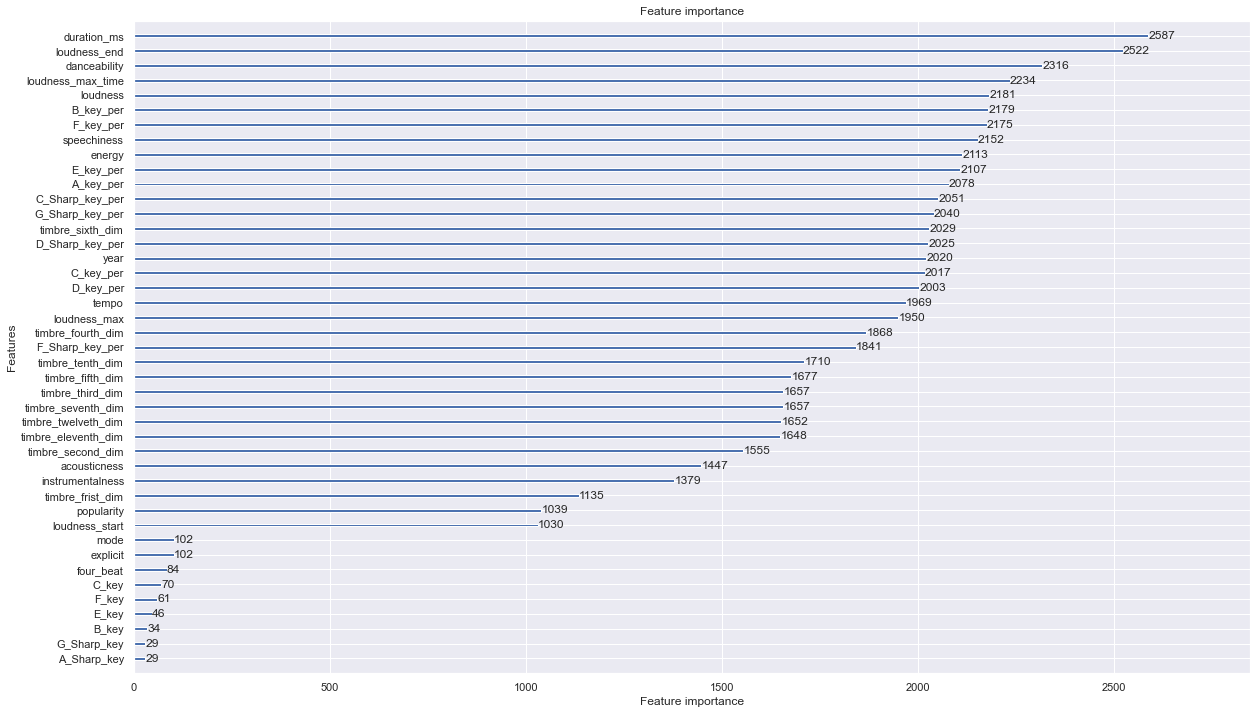

In [ ]:
lgb.plot_importance( gs_reg.best_estimator_, figsize=(20, 12))

- As we can see, the most important variables are related to `loudness`.
- `loudness_end`, `loudness` and `loudness_max_time` are in the top 5 most important variables.
- Also, the `duration` of the song and its `danceability` seems to play a crucial role.
- The `pitch` vector, which demonstrates the key participation in a song, followes shortly the top 5 features.
- Even though `timbre` explained 42% of the variance in the Linear Regression, it does not seem to be a significant predictor of `valence`.
- Lastly, what does not seem to predict `valence` is the existence of a `key`, `mode`, `explicit`, `popularity`, and `time_signature`.

### Random Forests

<b>Random forests</b> or random decision forests are an ensemble learning method.<br>
Again due to the nature of our task, we will use the regressor.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

- We will follow the exact same procedure we performed with the Boosting trees, only this time using Random Forests.

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(rf,
                                random_grid,
                                n_iter = 20,
                                scoring= 'neg_mean_absolute_error',
                                cv = 3,
                                verbose=1,
                                random_state=1,
                                n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [1, 11, 22, 33, 44, 55, 66,
                                                      77, 88, 99, 110],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 144, 188, 233,
                                                         277, 322, 366, 411,
                                                         455, 500]},
                   random_state=1, scoring='neg_mean_absolute_error',
                   verbose=1)

In [ ]:
- rf_random.best_score_

0.11897992752521408

In [ ]:
y_pred = rf_random.best_estimator_.predict(X_test)
print('Test Score:', metrics.mean_absolute_error(y_pred, y_test))

Test Score: 0.11746254440552599


- The results of the Random Forest are considerably lower than the ones <b>LightGBM</b> produced.
- Let's see if an exhaustive search using GridSearch can produce a better result

In [ ]:
rf_random.best_params_

{'n_estimators': 411,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 77,
 'bootstrap': True}

- We set our parameters based on the parameters found from the Random Search

In [ ]:
random_forest_grid = {'n_estimators': [411, 500],
                    'max_features': ['auto'],
                    'max_depth': [70, 77, 85],
                    'min_samples_split': [5],
                    'min_samples_leaf': [1],
                    'bootstrap': [True]}

In [ ]:
rf_grid_search = GridSearchCV(rf,
                            random_forest_grid,
                            scoring= 'neg_mean_absolute_error', # Grid Search always tries to maximize the score, so we use negative MSE.
                            cv = 3,
                            verbose = 1,
                            n_jobs = -1,
                            )
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [70, 77, 85],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [5], 'n_estimators': [411, 500]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
rf_grid_search.best_params_



{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [ ]:
- rf_grid_search.best_score_

0.11897630995678532

In [ ]:
y_pred = rf_grid_search.predict(X_test)
print('Test Score:', metrics.mean_absolute_error(y_pred, y_test))

Test Score: 0.11736303509283165


The final results of our dataset are:
- Cross Validation
    - RandomSearch : 0.11897
    - GridSearch : 0.11897
- Test set
    - RandomSearch : 0.11746
    - GridSearch : 0.11736

As we can see, our model did not improve much from the GridSearch, and the results remain considerably lower than the previous model.

#### Feature Importances

- Once more, the <b>Random forests</b> model, gives us the possibility to access the feature importances.

In [ ]:
# The base of this function was produced by: Professor P.louridas and is part of the course 'Applied Machine Learning' of AUEB.

# This fuction plots the importance of each feature.

def plot_feature_importance(X, best_estimator):

        importances = best_estimator.feature_importances_
        std = np.std([tree.feature_importances_ for tree in best_estimator.estimators_], axis=0)
        indices = np.argsort(importances)[::-1]
        feature_cols = X.columns
        plt.figure(figsize=(20, 10))
        plt.title("Feature importances")
        plt.bar(range(X.shape[1]), importances[indices],
        tick_label=[feature_cols[x] for x in indices],
        color="r", yerr=std[indices], align="center")
        plt.xlim([-1, X.shape[1]])
        _ = plt.xticks(rotation=45)

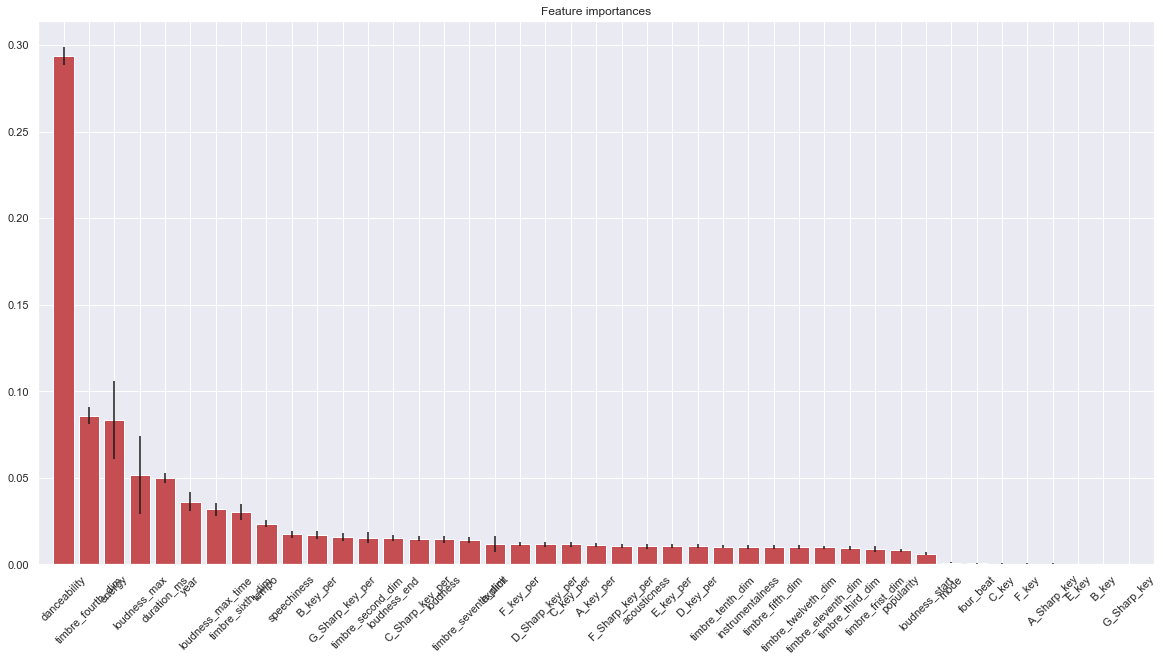

In [ ]:
plot_feature_importance(X_train, rf_grid_search.best_estimator_)

- The feature importances our almost identical to the ones <b>LightGBM</b> gave us.
- The strongest predictor is `danceability`.
- Also, everything related to `loudness`, as well the `year` and `duration` of the track is really important.
- The `pitch` is once more found in the middle of the pack, while `timbre` dimensions are split to significant and not significant.
- Once more, `key`, `mode`, `explicit`, `popularity`, and `time_signature` are found to be insignificant.

### Lasso and Ridge

Lastly, we will use Lasso and Ridge. Both of this methods are regression analysis methods that perform both variable<br> selection and regularization in order to enhance the prediction accuracy of the resulting statistical model.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

- In contrast with the decision trees, we first need to scale our data before we use these models.

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.85335703,  1.18224342,  1.01946774, ..., -0.28255049,
        -0.28558   , -0.01148675],
       [ 0.38941079, -1.33212902, -1.38018147, ..., -0.28255049,
        -0.31848117, -1.37231488],
       [-1.42628003, -1.22416624, -0.57828507, ..., -0.28255049,
        -0.12279981,  0.43298806],
       ...,
       [ 0.97936712, -0.77057463, -0.89431823, ..., -0.28255049,
        -0.57772857, -1.0951331 ],
       [ 0.60133685,  0.8820427 ,  0.92265039, ...,  3.5391905 ,
         0.58703419, -0.44567337],
       [-0.59003126,  0.15606981, -0.04729962, ..., -0.28255049,
         0.5727368 ,  0.29599419]])

- Next, we set our hyperparameter grid.
- We will perform GridSearchCV.
- We don't need to perform RandomSearch, because the models fit our data fast.

In [ ]:
lasso_params = {'alpha':[5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001],
                'max_iter' : [2000,3000,4000],
                'positive' : [True,False],
                'tol' : [0.0001,0.001,0.01]
                }

ridge_params = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20],
                'max_iter' : [1000, 1500, 2000],
                'positive' : [True,False],
                'tol' : [0.0001,0.001,0.01]
                }

In [ ]:
lasso = Lasso()
lasso_gs = GridSearchCV(lasso,
                            lasso_params,
                            cv=3 ,
                            scoring= 'neg_mean_absolute_error',
                            verbose = 1,
                            n_jobs = -1
                        )

lasso_gs.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,
                                   0.001, 0.0001],
                         'max_iter': [2000, 3000, 4000],
                         'positive': [True, False],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
- lasso_gs.best_score_

0.12816140801761827

In [ ]:
y_pred = lasso_gs.best_estimator_.predict(X_test_scaled)
print('Test Score:', metrics.mean_absolute_error(y_pred, y_test))

Test Score: 0.12905817244778867


The final results of our dataset are:
- Cross Validation
    - GridSearch : 0.12816
- Test set
    - GridSearch : 0.12905

In [ ]:
rdg = Ridge()
rdg_gs = GridSearchCV(rdg,
                            ridge_params,
                            cv=3 ,
                            scoring= 'neg_mean_absolute_error',
                            verbose = 1,
                            n_jobs = -1
                        )

rdg_gs.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20],
                         'max_iter': [1000, 1500, 2000],
                         'positive': [True, False],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
- rdg_gs.best_score_

0.12804763070803257

In [ ]:
y_pred = rdg_gs.best_estimator_.predict(X_test_scaled)
print('Test Score:', metrics.mean_absolute_error(y_pred, y_test))

Test Score: 0.12888608245428193


The final results of our dataset are:
- Cross Validation
    - GridSearch : 0.12804
- Test set
    - GridSearch : 0.12888

As we can see both methods train really fast, but fail to yield good results.

## Neural Networks

 Lastly, we are going to use Neural Networks to try and predict the `valence` of a track.
 - We are going to use a simple Neural Network, fit for a regression problem.

In [ ]:
# Libraries Needed

from  matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import BatchNormalization
from tensorflow.keras.layers.experimental import preprocessing

Lets First try out a Really simple model, to better undersatnd our models behaviour.


- First of all we to need to normalize our features.
- Instead of stardscaler, we will use *normalizing layer*.

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

Now we will build the model.
- We will use one dense layer consisting of 128 neurons, and the activation function will be *relu*.
- Anything above this will result in overfitting and waste of resources.
- *Relu* is considered by far the best activation function, for hidden layers in regression problems.
- Also, because `valence` ranges from 0 to 1, we will use a *sigmoid* activation function in our last layer.
- The loss function will be mean squared error, but we will also keep track of mean absolute error.
- Lastly, our optimazer will be Adam.

In [ ]:
def build_compile_model():
    model = keras.Sequential([
        normalizer,
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mae'])

    return model

model_simple = build_compile_model()
model_simple.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 43)               87        
 ion)                                                            
                                                                 
 dense_8 (Dense)             (None, 128)               5632      
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5,848
Trainable params: 5,761
Non-trainable params: 87
_________________________________________________________________


- Also, we will use `early_stopping` callback, and we will keep track of the validation score.
- This way, if our model starts to overfit, the neural network will stop training.

In [ ]:
early_stop =  keras.callbacks.EarlyStopping(monitor='val_loss', patience=40)

In [ ]:
num_epochs = 500

history = model_simple.fit(X_train, y_train, epochs= num_epochs, batch_size= 64,
                    validation_split=0.1, verbose=1,
                    callbacks=[early_stop])

Epoch 1/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0262 - mae: 0.1268 - val_loss: 0.0204 - val_mae: 0.1113
Epoch 2/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0196 - mae: 0.1094 - val_loss: 0.0191 - val_mae: 0.1075
Epoch 3/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0186 - mae: 0.1062 - val_loss: 0.0188 - val_mae: 0.1051
Epoch 4/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0179 - mae: 0.1040 - val_loss: 0.0186 - val_mae: 0.1046
Epoch 5/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0175 - mae: 0.1028 - val_loss: 0.0178 - val_mae: 0.1033
Epoch 6/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0171 - mae: 0.1016 - val_loss: 0.0177 - val_mae: 0.1023
Epoch 7/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0167 - mae: 0.1004 - val_loss: 0.0177 - val_mae: 0.1023
Epoch 8/500
673/673 [==============================] - 1s 1ms/step - 

- In order to better understand the validation we will plot the loss and validation score, across the epochs.

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

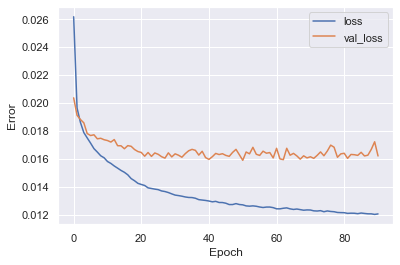

In [ ]:
plot_loss(history)

In [ ]:
model_simple.evaluate(X_test, y_test)

374/374 [==============================] - 0s 858us/step - loss: 0.0167 - mae: 0.0994


[0.01673593372106552, 0.09937235713005066]

- We can see that it took only 5 epochs for our model to start overfitting.
- To deal with this problem, we will add *dropout layers*.
- What *dropout layers* do, is that they randomly set input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
- We will start with a frequency of 0.5.

In [ ]:
def build_compile_model():
    model = keras.Sequential([
        normalizer,
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mae'])

    return model

model_drop_out = build_compile_model()
model_drop_out.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 43)               87        
 ion)                                                            
                                                                 
 dense_10 (Dense)            (None, 128)               5632      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 5,848
Trainable params: 5,761
Non-trainable params: 87
_________________________________________________________________


In [ ]:
history = model_drop_out.fit(X_train, y_train, epochs= num_epochs, batch_size= 64,
                    validation_split=0.1, verbose=1,
                    callbacks=[early_stop])

Epoch 1/500
673/673 [==============================] - 1s 2ms/step - loss: 0.0355 - mae: 0.1468 - val_loss: 0.0229 - val_mae: 0.1193
Epoch 2/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0253 - mae: 0.1255 - val_loss: 0.0209 - val_mae: 0.1134
Epoch 3/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0234 - mae: 0.1204 - val_loss: 0.0199 - val_mae: 0.1106
Epoch 4/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0222 - mae: 0.1169 - val_loss: 0.0192 - val_mae: 0.1083
Epoch 5/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0216 - mae: 0.1153 - val_loss: 0.0189 - val_mae: 0.1067
Epoch 6/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0211 - mae: 0.1135 - val_loss: 0.0187 - val_mae: 0.1060
Epoch 7/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0209 - mae: 0.1130 - val_loss: 0.0187 - val_mae: 0.1060
Epoch 8/500
673/673 [==============================] - 1s 1ms/step - 

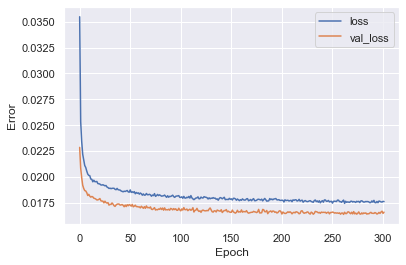

In [ ]:
plot_loss(history)

In [ ]:
model_drop_out.evaluate(X_test, y_test)

374/374 [==============================] - 0s 852us/step - loss: 0.0166 - mae: 0.1003


[0.01660997048020363, 0.10033456981182098]

- By adding the dropout layer, our model under fitted, which means that it did not learn as much as it could.
- We will decrease the dropout rate frequency from 0.5 to 0.3.

In [ ]:
def build_compile_model():
    model = keras.Sequential([
        normalizer,
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mae'])

    return model

model_drop_out_less = build_compile_model()
model_drop_out_less.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 43)               87        
 ion)                                                            
                                                                 
 dense_12 (Dense)            (None, 128)               5632      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 5,848
Trainable params: 5,761
Non-trainable params: 87
_________________________________________________________________


In [ ]:
history= model_drop_out_less.fit(X_train, y_train, epochs= num_epochs, batch_size= 64,
                    validation_split=0.1, verbose=1,
                    callbacks=[early_stop])

Epoch 1/500
673/673 [==============================] - 1s 2ms/step - loss: 0.0315 - mae: 0.1388 - val_loss: 0.0219 - val_mae: 0.1168
Epoch 2/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0232 - mae: 0.1196 - val_loss: 0.0198 - val_mae: 0.1102
Epoch 3/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0215 - mae: 0.1147 - val_loss: 0.0190 - val_mae: 0.1080
Epoch 4/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0205 - mae: 0.1118 - val_loss: 0.0188 - val_mae: 0.1064
Epoch 5/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0201 - mae: 0.1104 - val_loss: 0.0184 - val_mae: 0.1064
Epoch 6/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0196 - mae: 0.1092 - val_loss: 0.0184 - val_mae: 0.1050
Epoch 7/500
673/673 [==============================] - 1s 1ms/step - loss: 0.0194 - mae: 0.1084 - val_loss: 0.0180 - val_mae: 0.1046
Epoch 8/500
673/673 [==============================] - 1s 1ms/step - 

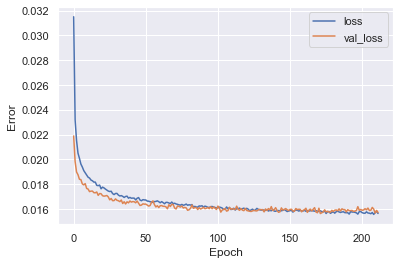

In [ ]:
plot_loss(history)

In [ ]:
model_drop_out_less.evaluate(X_test, y_test)

374/374 [==============================] - 0s 869us/step - loss: 0.0158 - mae: 0.0973


[0.01583751291036606, 0.09725731611251831]

- That is way greater results than before!
- Lastly to further boost the performance of our model, we will add a decay rate for the learning rate of our optimazer.
- This way, when the epochs get higher the learning rate will get smaller.

In [ ]:
STEPS_PER_EPOCH = 4.6e4 // 64

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
                                                            0.001,
                                                            decay_steps=STEPS_PER_EPOCH * 400,
                                                            decay_rate=1,
                                                            staircase=False)

In [ ]:
def build_compile_model():
    model = keras.Sequential([
        normalizer,
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr_schedule), metrics=['mae'])

    return model

model_dropout_decay = build_compile_model()
model_dropout_decay.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 43)               87        
 ion)                                                            
                                                                 
 dense_14 (Dense)            (None, 128)               5632      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 5,848
Trainable params: 5,761
Non-trainable params: 87
_________________________________________________________________


In [ ]:
num_epochs = 400

history = model_dropout_decay.fit(X_train, y_train, epochs= num_epochs, batch_size= 64,
                     validation_split=0.1, verbose=1,
                   callbacks=[early_stop])

Epoch 1/400
673/673 [==============================] - 1s 2ms/step - loss: 0.0310 - mae: 0.1376 - val_loss: 0.0217 - val_mae: 0.1164
Epoch 2/400
673/673 [==============================] - 1s 1ms/step - loss: 0.0232 - mae: 0.1194 - val_loss: 0.0202 - val_mae: 0.1111
Epoch 3/400
673/673 [==============================] - 1s 1ms/step - loss: 0.0215 - mae: 0.1149 - val_loss: 0.0190 - val_mae: 0.1077
Epoch 4/400
673/673 [==============================] - 1s 1ms/step - loss: 0.0206 - mae: 0.1121 - val_loss: 0.0188 - val_mae: 0.1060
Epoch 5/400
673/673 [==============================] - 1s 1ms/step - loss: 0.0200 - mae: 0.1104 - val_loss: 0.0184 - val_mae: 0.1054
Epoch 6/400
673/673 [==============================] - 1s 1ms/step - loss: 0.0198 - mae: 0.1096 - val_loss: 0.0183 - val_mae: 0.1052
Epoch 7/400
673/673 [==============================] - 1s 1ms/step - loss: 0.0194 - mae: 0.1088 - val_loss: 0.0181 - val_mae: 0.1035
Epoch 8/400
673/673 [==============================] - 1s 1ms/step - 

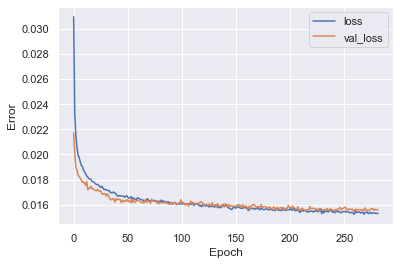

In [ ]:
plot_loss(history)

In [ ]:
model_dropout_decay.evaluate(X_test, y_test)

374/374 [==============================] - 0s 861us/step - loss: 0.0156 - mae: 0.0964


[0.015619421377778053, 0.09643372148275375]

Finally, the learning scheduler helped our model learn even more, reaching a final MAE of 0.096433.

## Model Comparison

- The best model produced was our <b>Neural Network</b>. This model achieved an MAE of 0.09643 on the test set.

In [ ]:
model_dropout_decay.evaluate(X_test, y_test)

374/374 [==============================] - 0s 890us/step - loss: 0.0156 - mae: 0.0964


[0.015619421377778053, 0.09643372148275375]

- From our non-connectivist models, <b>LightGBM</b> did exceptionally well.
- It managed to reach practically the same MAE score as our NN.

In [ ]:
y_pred = gs_reg.best_estimator_.predict(X_test)
print('Test Score:', metrics.mean_absolute_error(y_pred, y_test))

Test Score: 0.09688892510140776


- If we consider that the Decision trees give us access to the Feature Importances, one could argue that this model is better than the NN.
- We gain practically the same results, while simultaneously knowing what feature influenced `valence` more.
- In our case, we care most about the result, so we deem the <b>NN</b> to be our best model.
- But, the <b>LightGBM</b> model was as good, if not better if we consider that it is easier to train and interpret.

On the other hand, the <b>Random Forest</b>, <b>Lasso</b> and <b>Ridge</b> models did not perform as well.<br>

- Starting with the <b>Random Forest</b> model, it did not yield good results compare to the  <b>NN</b> and <b>LightGBM</b> model.
- Also, it was really slow to train (Slower than every other method).
- The only upside is that it gives interpretability through the feature importances.

In [ ]:
y_pred = rf_grid_search.predict(X_test)
print('Test Score:', metrics.mean_absolute_error(y_pred, y_test))

Test Score: 0.11736303509283165


- <b>Lasso</b> and <b>Ridge</b> performed the same way. Poorly.
- They were the fastest to train, but due to a lack of hyper parametrizing, they could not achieve a great score.

In [ ]:
y_pred = lasso_gs.best_estimator_.predict(X_test_scaled)
print('Test Score:', metrics.mean_absolute_error(y_pred, y_test))

Test Score: 0.12905817244778867


In [ ]:
y_pred = rdg_gs.best_estimator_.predict(X_test_scaled)
print('Test Score:', metrics.mean_absolute_error(y_pred, y_test))

Test Score: 0.12888608245428193


- We would not suggest them for such complex problems.

## Best Model - Test set

Finally, we will test our models with the new test set Professor Louridas gave us.<br>
The best model is our Nural Network Model.

In [ ]:
model_dropout_decay.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 43)               87        
 ion)                                                            
                                                                 
 dense_14 (Dense)            (None, 128)               5632      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 5,848
Trainable params: 5,761
Non-trainable params: 87
_________________________________________________________________


- As we mentioned before, this set was not used in not part of the training set, and thus it was not used for training the model.
- The tracks are 1161 instead of 1162 because one track did not contain Audio Analysis.
- Thus we could not retrieve the necessary information for it.
- Because it is only one, it will not affect the outcome.

In [ ]:
test_set.data

danceability  loudness_max  loudness  year  loudness_max_time  \
1360          0.449    -10.966066    -8.964  2020           0.074479   
2643          0.667     -5.353452    -5.371  2020           0.056419   
2808          0.725     -9.436046    -8.958  2016           0.050695   
3150          0.527     -4.758988    -5.298  2014           0.071120   
4219          0.749     -5.223118    -5.063  2018           0.061446   
...             ...           ...       ...   ...                ...   
60958         0.596     -6.245689    -5.167  2021           0.058101   
60959         0.588     -7.443791    -6.431  2021           0.049178   
60960         0.754     -8.765307    -6.811  2021           0.061354   
60961         0.584     -5.485316    -4.925  2021           0.062063   
60962         0.331     -7.868360    -5.362  2017           0.093630   

       timbre_sixth_dim  explicit  energy  speechiness  duration_ms  ...  \
1360         -10.287608         0   0.465       0.0791       198371  ...   
2643         -27.977442         1   0.719       0.0346       237520  ...   
2808         -21.969284         0   0.446       0.0287       187333  ...   
3150         -31.578558         0   0.835       0.0433       176658  ...   
4219         -14.285691         1   0.794       0.0640       269554  ...   
...                 ...       ...     ...          ...          ...  ...   
60958         -9.769350         1   0.650       0.3370       257428  ...   
60959        -26.533251         0   0.850       0.0318       187310  ...   
60960        -13.813517         1   0.660       0.2670       209299  ...   
60961        -27.087110         0   0.836       0.0790       202204  ...   
60962        -24.236085         0   0.450       0.0340       218755  ...   

       C_key  mode  G_Sharp_key  four_beat  popularity  D_Sharp_key_per  \
1360       1     1            0          0          62         0.257728   
2643       0     0            0          1          91         0.298357   
2808       0     0            0          1          55         0.185542   
3150       0     1            0          1          81         0.415681   
4219       1     1            0          1          74         0.244878   
...      ...   ...          ...        ...         ...              ...   
60958      0     1            0          1          77         0.403616   
60959      0     1            0          1          11         0.310013   
60960      1     1            0          1          64         0.238971   
60961      1     1            0          1           0         0.273951   
60962      0     1            0          1          78         0.433306   

       B_key  E_key  F_Sharp_key_per  timbre_third_dim  
1360       0      0         0.189563         12.469150  
2643       0      0         0.240185        -11.240187  
2808       0      1         0.247395        -16.276349  
3150       0      0         0.512407         33.835816  
4219       0      0         0.328036        -16.342871  
...      ...    ...              ...               ...  
60958      0      0         0.275779        -34.752324  
60959      0      1         0.362626         -4.131437  
60960      0      0         0.199572        -17.097046  
60961      0      0         0.351312          5.102990  
60962      0      0         0.219432         21.775314  

[1161 rows x 43 columns]

In [ ]:
test_set.target

1360     0.543
2643     0.717
2808     0.311
3150     0.654
4219     0.460
         ...  
60958    0.188
60959    0.768
60960    0.316
60961    0.484
60962    0.180
Name: valence, Length: 1161, dtype: float64

- Our Best models prediction is presented below.

In [ ]:
model_dropout_decay.evaluate(test_set.data, test_set.target)

37/37 [==============================] - 0s 889us/step - loss: 0.0181 - mae: 0.1069


[0.01807674951851368, 0.10686662793159485]

- The Mean Absolute Error (MAE) of our best prediction achieved is <b>0.10686662793159485</b>.